<a href="https://colab.research.google.com/github/duchaba/Norwegian_Blue_Parrot_k2fa_AI/blob/master/Book_Time_Series_chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.0 Time Series Book Chapter 4

In [ ]:
#@title OPTIONAL hack the Jupyter notebook to add CSS
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts (from line #10 to #17) and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%js
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #fd7e14 !important;border-radius: 10px 0 0 10px;padding: 1em 1em 1em 1em;border-bottom: 1px solid #343845}"
css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;}"
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;font-size:120%;} h3{color:#fd7e14 !important;font-size:120%;} h4{color:#6610f2 !important;}"
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));

<IPython.core.display.Javascript object>

## 4.1 Setup

#### tsai

In [ ]:
#@title Install TSAI package first (MUST "Restart Runtime" after install)
#%%capture tsai_log
stable = False # True: stable version in pip, False: latest version from github
if stable is True: 
  !pip install tsai 
else:
  # use the dec 29, 2021 commit version
  !pip install git+https://github.com/timeseriesAI/tsai.git@eec6245fdceb1e1d1092b015ff4399778a9cdf37
## NOTE: REMEMBER TO RESTART (NOT RECONNECT/ RESET) THE KERNEL/ RUNTIME ONCE THE INSTALLATION IS FINISHED

     |████████████████████████████████| 213 kB 9.8 MB/s 
     |████████████████████████████████| 2.5 MB 53.5 MB/s 
     |████████████████████████████████| 189 kB 85.5 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 6.2 MB 45.4 MB/s 
     |████████████████████████████████| 3.3 MB 47.9 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 15.3 MB 46.3 MB/s 
     |████████████████████████████████| 26.3 MB 113.4 MB/s 
     |████████████████████████████████| 14.9 MB 54.3 MB/s 
     |████████████████████████████████| 9.8 MB 22.6 MB/s 
     |████████████████████████████████| 119 kB 54.1 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.8 MB/s 
     |████████████████████████████████| 837 kB 66.5 MB/s 
     |████████████████████████████████| 134 kB 69.2 MB/s 
     |████████████████████████████████| 830 kB 63.7 MB/s 
     |███████████

>Ignore the "error" above and remember to "Restart Runtime"

In [ ]:
# if failed, be sure to "Restart Runtime" after install above
#
from tsai.all import *
#print(tsai_log)
#computer_setup()
#print ("\n".join(get_UCR_univariate_list()))

#### tim

In [1]:
import pandas_datareader.data as web
import pandas
import numpy
import matplotlib
import seaborn 
seaborn.set_style('whitegrid')
#@title Setup Time Series Book (Tim)
#
# create class
class TSBook(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Duc Haba and Oswald Compensato"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    #
    # color pallete
    self.color_primary = "#ff7900"
    self.color_secondary = "#00c6d7"
    self.color_success = "#cf0072"
    self.color_warning = "#d9e506"
    self.color_base = "#830051"
    self.color_hold = "#766a65"
    self.color_gray80 = "#343a40"
    self.color_gray70 = "#495057"
    self.color_gray40 = "#ced4da"
    self.color_gray20 = "#e9ecef"
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  # 
  def _pw(self,a,b):
    if b:
      self._pp("status", a)
    return
  #
  def find_rmse(self,y,yhat):
    e = numpy.sqrt(numpy.mean(numpy.square(y-yhat)))
    return numpy.round(e, 4)
# ---end of D0HZ class
#
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator
#
#
# fixed randomize
@add_method(TSBook)
def random_seed(seed_value=514229, use_cuda=True):
  numpy.random.seed(seed_value) # cpu vars
  torch.manual_seed(seed_value) # cpu  vars
  numpy.random.seed(seed_value) # Python
  if use_cuda: 
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value) # gpu vars
    torch.backends.cudnn.deterministic = True  #needed
    torch.backends.cudnn.benchmark = False
  return
#
# That's it.
#
tim = TSBook("Tim")


---------------------------------------- : ----------------------------------------
                              Hello from : TSBook
                               Code name : Tim
                               Author is : Duc Haba and Oswald Compensato
---------------------------------------- : ----------------------------------------


In [2]:
#@title System, GPU, and CPU Info
#
import torch
import pynvml
import gc
import psutil
@add_method(TSBook)
def fetch_gpu_info(self):
  gpu_total = gpu_free = cpu_free = gc_free = 0
  try:
    gc_free = gc.collect()
    torch.cuda.empty_cache()  # 
    val = psutil.virtual_memory()._asdict()
    cpu_free = round((val["available"] / (1024**3)), 2)
    # self.parent.bag.cpu_ram_free = cpu_free
    #
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    info = pynvml.nvmlDeviceGetMemoryInfo(handle)
    gpu_free = round(info.free / (1024**3), 2)
    # self.parent.bag.gpu_ram_free = gpu_free
    #
    gpu_total = round(info.total / (1024**3), 2)
  except:
    self._ph()
    self._pp("**Error", "NO GPU accelerator")
    self._pp("Suggest recovery", "Menu > Runtime > Change Runtime Type > {select} GPU accelerator")
  return gpu_total, gpu_free, cpu_free, gc_free
#
#
@add_method(TSBook)
def say_gpu_info(self):
  gpu_total, gpu_free, cpu_free, gc_free = self.fetch_gpu_info()
  self._ph()
  print("%40s : %6.2f GB" % ("Total GPU RAM", gpu_total))
  print("%40s : %6.2f GB" % ("Free GPU RAM", gpu_free))
  print("%40s : %6.2f GB" % ("Free CPU RAM", cpu_free))
  print("%40s : %6.2f" % ("Garbage collection recovered", gc_free))
  self._ph()
  return
#
#
import datetime
import sys
import fastai
import psutil
#
@add_method(TSBook)
def say_sys_info(self):
  self._ph()
  now = datetime.datetime.now()
  self._pp("System time", now.strftime("%Y/%m/%d %H:%M"))
  self._pp("Platform", sys.platform)
  #self.parent.bag.platform = sys.platform
  self._pp("Python version", sys.version)
  #self.parent.bag.python_version = sys.version
  self._pp("PyTorch version", torch.__version__)
  #self.parent.bag.pytorch_version = torch.__version__
  self._pp("Fastai version is: ", fastai.__version__)
  #self.parent.bag.fastai_version = fastai.__version__
  # self._pp("Monty version", self.parent.__version__)
  val = psutil.cpu_count()
  self._pp("CPU count", val)
  #self.parent.bag.cpu_count = val
  val = psutil.cpu_freq()
  if (None != val):
    val = val._asdict()
    self._pp("CPU speed", (str(round((val["current"] / 1000), 2)) + " GHz"))
    self._pp("CPU max speed", (str(round((val["max"] / 1000), 2)) + " GHz"))
    #self.parent.bag.cpu_max_ghz = round((val["max"] / 1000), 2)
  else:
    self._pp("*CPU speed", "NOT available")
  self._ph()
  return
#

In [3]:
tim.say_sys_info()

---------------------------------------- : ----------------------------------------
                             System time : 2022/03/10 06:07
                                Platform : linux
                          Python version : 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
                         PyTorch version : 1.10.0+cu111
                     Fastai version is:  : 1.0.61
                               CPU count : 4
                              *CPU speed : NOT available
---------------------------------------- : ----------------------------------------


In [4]:
tim.say_gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.90 GB
                            Free GPU RAM :  15.90 GB
                            Free CPU RAM :  23.90 GB
            Garbage collection recovered : 105.00
---------------------------------------- : ----------------------------------------


>Side note: Mindful of the Python version, import-library version, and the availability of CPU and GPU RAM

## 4.2 Fetch Data

>Side note: The difference between global space and lib space

```
from random import random
import numpy as np
from numpy.random import *
# usage
random()
np.arange(1,100)
```
versus
```
import numpy
#usage
numpy.random.random()
numpy.arange(1,100)
```

Get 3 real-world datasets and one control dataset.
- Apple stocks
- Covid19 infection rate for youth in California
- World climate data from NOAA
- Control dataset, quadratic formular

In [5]:
#title Get real-world datasets
#isinstance(x, pandas.DataFrame)
#if (type(x) is pandas.DataFrame):
#  print("True")
# get noise
import matplotlib
import numpy
@add_method(TSBook)
def _fetch_noise(self):
  x = 1 if numpy.random.random() < 0.5 else -1
  y = numpy.random.random() * x * 0.5
  return y 
#
@add_method(TSBook)
def _split_xy(self,orig,split_y=15.0,is_reverse=False):
  end = len(orig)
  start = end - numpy.floor(end * (split_y/100.0))
  end = int(end)
  start = int(start)
  z = orig.copy()
  if (is_reverse):
    z.sort_index(ascending=True, inplace=True)
  y = pandas.DataFrame(z.iloc[start:end])
  x = pandas.DataFrame(z.iloc[0:start])
  x.columns = ["x-train"]
  y.columns = ["y-validate"]
  return x,y
#
#
@add_method(TSBook)
def _fetch_quad(self,equation, split_y):
  # get the quadratic data
  df = pandas.DataFrame([self._fetch_noise() + (x*x) for x in numpy.arange(1.0,5.0,0.025,dtype=float)])
  df.index.name = "Date"
  #self.df4_nonoise = [(x*x) for x in numpy.arange(1.0,5.0,0.025,dtype=float)]
  x,y = self._split_xy(orig=df,split_y=split_y)
  self.df_orig.append(df)
  self.df_x.append(x)
  self.df_y.append(y)
  return
#
@add_method(TSBook)
def _fetch_stock_price(self, ticker,split_y):
  tick = "AAPL"
  df = web.DataReader(tick, 'stooq')
  x,y = self._split_xy(orig=df["Close"],split_y=split_y,is_reverse=True)
  self.df_orig.append(df)
  self.df_x.append(x)
  self.df_y.append(y)
  return
#
@add_method(TSBook)
def _fetch_covid19(self,ticker,split_y, demog="0-17", uni="total_cases"):
  url = 'https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/e2c6a86b-d269-4ce1-b484-570353265183/download/covid19casesdemographics.csv'
  column = 'demographic_value'
  self.df2_covid19_orig = pandas.read_csv(url, index_col=7)
  self.df2_covid19_orig.index = pandas.to_datetime(self.df2_covid19_orig.index)
  df = pandas.DataFrame(self.df2_covid19_orig.loc[self.df2_covid19_orig[column] == demog][uni])
  df.index.name = "Date"
  x,y = self._split_xy(orig=df,split_y=split_y,is_reverse=False)
  self.df_orig.append(self.df2_covid19_orig)
  self.df_x.append(x)
  self.df_y.append(y)
  return
#
@add_method(TSBook)
def _fetch_world_climate(self,ticker,split_y):
  url = "https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/11/1880-2021/data.csv"
  df = pandas.read_csv(url, skiprows=4,index_col=0)
  df.index= pandas.to_datetime(df.index,format="%Y%m")
  df.index.name = "Date"
  x,y = self._split_xy(orig=df,split_y=split_y,is_reverse=False)
  self.df_orig.append(df)
  self.df_x.append(x)
  self.df_y.append(y)
  return
# draw datasets 
@add_method(TSBook)
def draw_forecast(self, df_y, df_yhat,pic,y_color="lightskyblue",yhat_color="deeppink", title="",is_dot=False):
  loss = self.find_rmse(df_y.iloc[:,0], df_yhat.iloc[:,0])
  if (is_dot is True):
    y1 = df_y.reset_index(drop=True)
    y2 = df_yhat.reset_index(drop=True)
    i = y1.plot.area(ax=pic,color= y_color, alpha=0.5, title=title+" Loss Rate (RMSE) " + str(loss),label="Y, Original")
    i = y2.plot.line(ax=pic,color=yhat_color, label="Y_hat, Prediction")
    i = y2.plot.scatter(ax=pic,x=0,y=1, color=yhat_color,s=150)
  else:
    i = df_y.plot.area(ax=pic,color= y_color, alpha=0.5, title=title+" Loss Rate (RMSE) " + str(loss),label="Y, Original")
    i = df_yhat.plot.line(ax=pic,color=yhat_color, label="Y_hat, Prediction")
  
  return 
#
@add_method(TSBook)
def draw_xy(self,x,y,title="Quadratic Equation",ylabel="",figsize=(9,4),xlabel=None):
  ax1 = x.plot.line(figsize=figsize)
  if (xlabel is None):
    ax2 = y.plot.area(ax=ax1,color="hotpink", alpha=0.5,title=title,ylabel=ylabel)
  else:
    ax2 = y.plot.area(ax=ax1,color="hotpink", alpha=0.5,title=title,ylabel=ylabel,xlabel=xlabel)
  matplotlib.pyplot.show()
  return ax2
#
# draw datasets line 
@add_method(TSBook)
def draw_xy_line(self,x,y=None,ax=None,title="Quadratic Equation",ylabel="",figsize=(9,4),xlabel=None,xcolor="skyblue",ycolor="hotpink",is_reset_index=False):
  if (is_reset_index):
    x1 = x.copy()
    y1 = y.copy()
    x1.reset_index(drop=True,inplace=True)
    y1.reset_index(drop=True,inplace=True)
  else:
    x1 = x
    y1 = y
  #
  ax1 = x1.plot.line(figsize=figsize,color=xcolor)
  if (y1 is not None):
    if (xlabel is None):
      ax2 = y1.plot.line(ax=ax1,color=ycolor, alpha=0.5,title=title,ylabel=ylabel)
    else:
      ax2 = y1.plot.line(ax=ax1,color=ycolor, alpha=0.5,title=title,ylabel=ylabel,xlabel=xlabel)
    matplotlib.pyplot.show()
  return 
#
@add_method(TSBook)
def write_file(self,df,fname):
  try:
    df.to_csv(fname,line_terminator="\r\n")
    self._ph()
    self._pp(fname, "Write successful")
    self._ph()
  except:
    self._ph()
    self._pp(fname, "Write FAILED")
    self._ph()
  return
#
@add_method(TSBook)
def write_all_datasets(self):
  fname = ["apple_stock", "covid19", "global_warming", "rocket_quad"]
  for i in range(4):
    n = fname[i] + "_train.csv"
    self.write_file(self.df_x[i],n)
    n = fname[i] + "_test.csv"
    self.write_file(self.df_y[i],n)
  return
#
# Fetch the four data series
@add_method(TSBook)
def fetch_datasets_4(self,tickers=[{"tick":"APPL", "split_y":15}, {"tick":"demographic_value", "split_y":15}, {"tick":"climate", "split_y":20}, {"tick":"Quadratic","split_y":15}]):
  # get apple stock
  self.df_orig = []
  self.df_x = []
  self.df_y = []
  self.df_yhat = []
  self._fetch_stock_price(tickers[0]["tick"],split_y=tickers[0]["split_y"])
  # get covid youth data
  self._fetch_covid19(tickers[1]["tick"],split_y=tickers[1]["split_y"], demog="0-17", uni="percent_cases")
  # get World Noah surface temperature anomalies 
  self._fetch_world_climate(tickers[2]["tick"],split_y=tickers[2]["split_y"])
  # get the quadratic data
  self._fetch_quad(equation=tickers[3]["tick"],split_y=tickers[3]["split_y"])
  return

### Fetch data

In [6]:
# Fetch the data
tim.fetch_datasets_4()

In [7]:
#
@add_method(TSBook)
def print_data_head_tail(self):
  for i in range(0,4):
    display(tim.df_orig[i].head(3))
    display(tim.df_orig[i].tail(2))
  return

In [8]:
tim.print_data_head_tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-09,161.475,163.41,159.41,162.95,91454905
2022-03-08,158.820,162.88,155.80,157.44,131148280
2022-03-07,163.360,165.02,159.04,159.30,96418845


,Open,High,Low,Close,Volume
Date,,,,,
2017-03-14,32.923,33.007,32.809,32.846,64775404
2017-03-13,32.889,32.953,32.806,32.899,73714411


,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population
report_date,,,,,,,
2020-04-22,Age Group,0-17,855,2.3,0,0.0,22.5
2020-04-23,Age Group,0-17,936,2.4,0,0.0,22.5
2020-04-24,Age Group,0-17,1011,2.5,0,0.0,22.5


,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population
report_date,,,,,,,
2022-03-07,Race Ethnicity,White,1651077,24.3,28564,34.0,36.6
2022-03-08,Race Ethnicity,White,1653002,24.3,28631,34.0,36.6


,Value
Date,
1880-01-01,-0.02
1880-02-01,-0.14
1880-03-01,-0.09


,Value
Date,
2021-11-01,0.90
2021-12-01,0.84


,0
Date,
0,0.652206
1,1.210845
2,0.956689


,0
Date,
158,24.626708
159,25.026058


In [ ]:
tim.write_all_datasets()

---------------------------------------- : ----------------------------------------
                   apple_stock_train.csv : Write successful
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                    apple_stock_test.csv : Write successful
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                       covid19_train.csv : Write successful
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                        covid19_test.csv : Write successful
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
    

### Graph it

In [55]:
max(-12,0)

0

In [181]:
#
@add_method(TSBook)
def _draw_area_with_neg(self,df,pic,color="gray",alpha=0.3,i_start=0):
  y1 = numpy.concatenate(df.values, axis=0)
  #
  y2 = numpy.zeros(len(y1),dtype=float)
  start = i_start
  end = start + len(y1)
  x1 = numpy.arange(start, end, dtype=int)
  # Plot lines
  pic.plot(x1,y1, color=color,alpha=alpha)
  pic.plot(x1, y2, color=color)

  # Fill area 
  pic.fill_between(
    x1,y1, y2, 
    interpolate=True, color=color, alpha=alpha, 
  )
  #
  return
#
@add_method(TSBook)
def _draw_area_with_neg_helper(self,df_x,pic,df_y=None,color="gray"):
  if (df_y is None):
    self._draw_area_with_neg(df_x,pic)
  else:
    self._draw_area_with_neg(df_y,pic,i_start=len(df_x),alpha=0.85)
    self._draw_area_with_neg(df_x,pic)
  return
#
@add_method(TSBook)
def _draw_area(self,df_x, pic, df_y=None, color="gray",is_scatter=False,dot=120,ycolumn="x-train"):
  if (df_y is not None):
    max_y = numpy.round(max(float(df_x.max().values), float(df_y.max().values))) + 2
    if (is_scatter is True):
      df_y.reset_index().plot.scatter(x="Date",y=ycolumn,ax=pic,color=color, s=dot, alpha=0.90)
    else:
      df_y.plot.area(ax=pic,color=color, alpha=0.85)
    pic.set_ylim([0,max_y])
    print("max_y: ", max_y)
  df_x.plot.area(ax=pic,color=color, alpha=0.3)
  return
#
@add_method(TSBook)
def _draw_xy_old(self,df_x, pic, df_y=None, color="gray",is_area=True,dot=120,ycolumn="x-train"):
  if (df_y is not None):
    max_y = numpy.round(max(float(df_x.max().values), float(df_y.max().values))) + 2
    min_y = numpy.floor(min(float(df_x.min().values), float(df_y.min().values)))
    if (is_area is True):
      pic.set_ylim([0,max_y])
      df_y.plot.area(ax=pic,color=color, alpha=0.85)
    else:
      pic.set_ylim([min_y,max_y])
      df_y.reset_index().plot.scatter(x="Date",y=ycolumn,ax=pic,color=color, s=dot, alpha=0.90)
    #print("max_y: ", max_y)
  if (is_area is True):
    df_x.plot.area(ax=pic,color=color, alpha=0.3)
  else:
    df_x.plot.line(ax=pic,color=color, alpha=0.5, linewidth=3.0)
  return
#
@add_method(TSBook)
def _combine_xy(self,df_x,df_y):
  df = df_y.copy()
  df.columns = ["x-train"]
  df = pandas.concat([df_x, df])
  return df
#
@add_method(TSBook)
def draw_datasets(self,show_split=False):
  canvas, pic = matplotlib.pyplot.subplots(2,2, figsize=(18,12)) 
  j = 0
  title=["Stock Data", "Covid-19", "Global Warming", "Quadratic [rocket]"]
  for i in range(0,4):
    k = i%2
    # global warning has negaive value
    neg = 2
    # combine "train" and "test" dataset
    df = self._combine_xy(self.df_x[i], self.df_y[i])
    #
    if (i == neg):
      j = 1
      if (show_split is True):
        self._draw_area_with_neg_helper(self.df_x[i],pic[j][k],df_y=self.df_y[i])
        self._draw_area_with_neg_helper(self.df_x[i],pic[j][k])
      else:
        self._draw_area_with_neg_helper(df,pic[j][k])
    else:
      if (show_split is True):
        self._draw_xy(self.df_x[i],pic[j][k],df_y=self.df_y[i])
      else:
        self._draw_xy(df,pic[j][k])
      #
    pic[j][k].set_title(title[i], fontweight ="bold")
  #
  canvas.show()
  return

In [218]:
#
@add_method(TSBook)
def _draw_xy(self,df_x, pic, df_y=None, color="gray",is_area=True,dot=120,ycolumn="x-train"):
  if (df_y is not None):
    max_y = numpy.round(max(float(df_x.max().values), float(df_y.max().values))) + 2
    min_y = numpy.floor(min(float(df_x.min().values), float(df_y.min().values)))
    if (is_area is True):
      pic.set_ylim([0,max_y])
      df_y.plot.area(ax=pic,color=color, alpha=0.85)
    else:
      pic.set_ylim([min_y,max_y])
      #df_y.reset_index().plot.scatter(x="Date",y=ycolumn,ax=pic,color=color, s=dot, alpha=0.90)
      df_y.plot.line(ax=pic,color=color, alpha=0.95, linewidth=2.0)
    #print("max_y: ", max_y)
  if (is_area is True):
    df_x.plot.area(ax=pic,color=color, alpha=0.3)
  else:
    df_x.plot.line(ax=pic,color=color, alpha=0.5, linewidth=3,linestyle="dotted")
  return

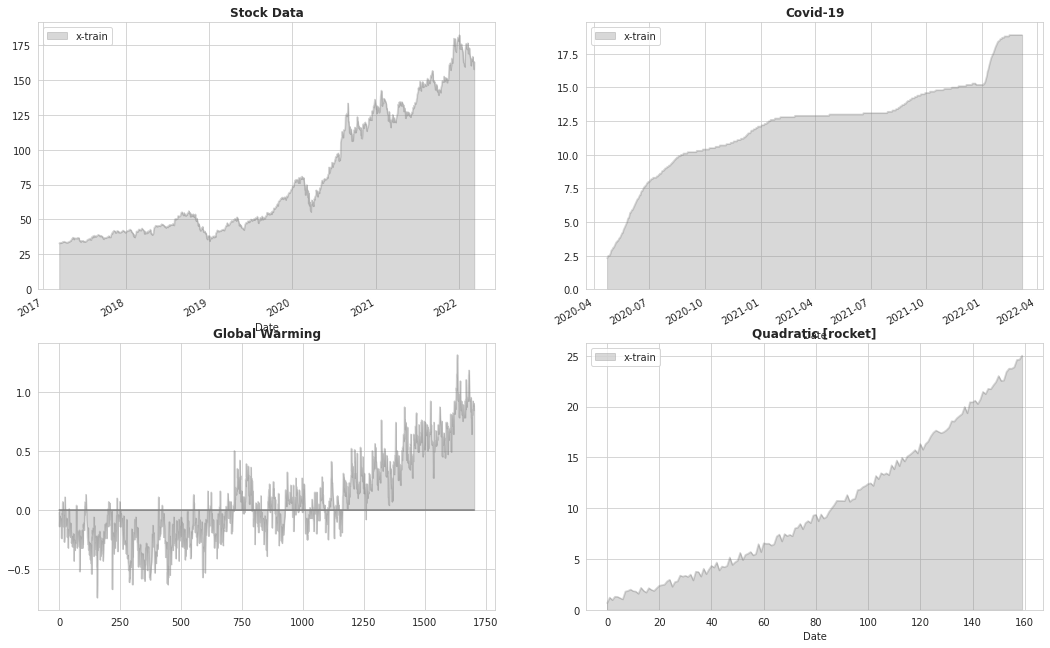

In [183]:
tim.draw_datasets()

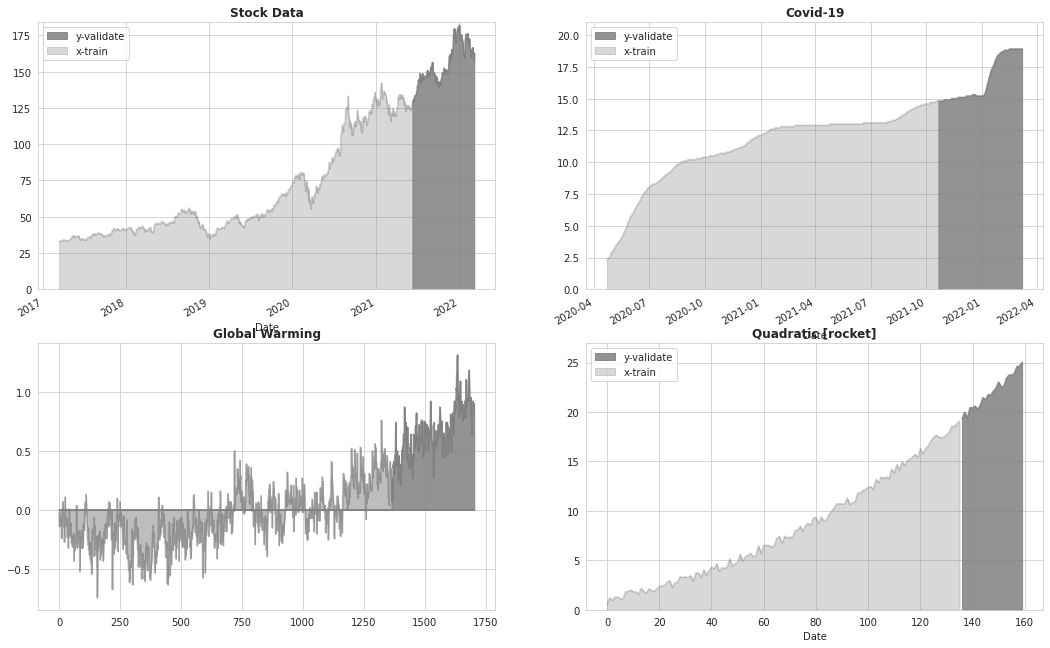

In [184]:
tim.draw_datasets(show_split=True)

#### scratch

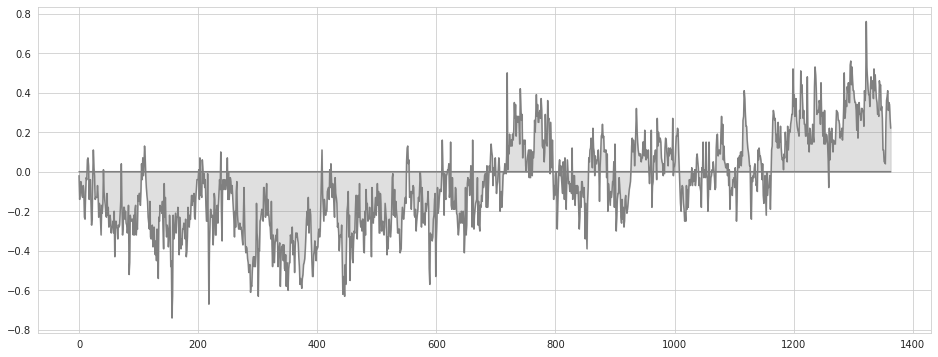

In [ ]:
canvas, pic = matplotlib.pyplot.subplots(1,1, figsize=(16,6)) 
tim._draw_area_with_neg(tim.df_x[2],pic,label="Global Tempeture")
canvas.show()

In [ ]:
df = tim.df_y[0].copy()
df.columns = ["x-train"]
df.head()

,x-train
Date,
2021-06-08,126.37
2021-06-09,126.76
2021-06-10,125.74
2021-06-11,126.97
2021-06-14,130.09


In [ ]:
df2 = pandas.concat([tim.df_x[0], df])
df2.tail()

,x-train
Date,
2022-02-28,165.12
2022-03-01,163.20
2022-03-02,166.56
2022-03-03,166.23
2022-03-04,163.17


In [ ]:
df2.head()

,x-train
Date,
2017-03-08,32.849
2017-03-09,32.773
2017-03-10,32.883
2017-03-13,32.899
2017-03-14,32.846


In [ ]:
x = numpy.concatenate(tim.df_x[2].values, axis=0)
type(x)

numpy.ndarray

In [ ]:
y = numpy.zeros(len(x),dtype=int)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
tim.df_x[0].head()

,x-train
Date,
2017-03-07,32.975
2017-03-08,32.849
2017-03-09,32.773
2017-03-10,32.883
2017-03-13,32.899


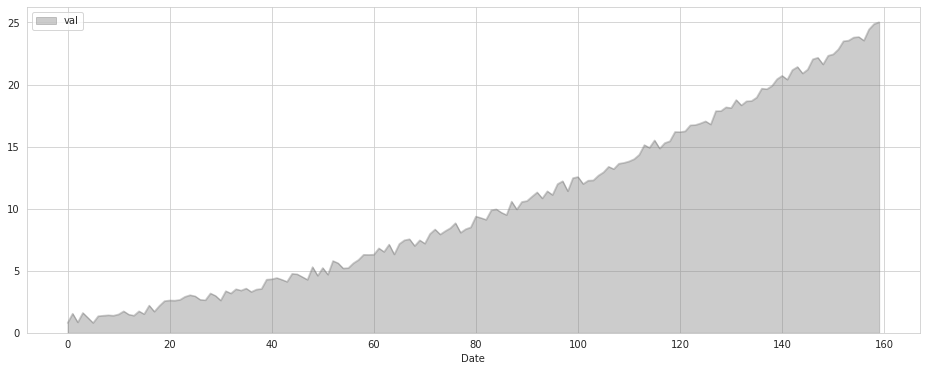

In [ ]:
canvas, pic = matplotlib.pyplot.subplots(1,1, figsize=(16,6)) 
dfx = tim.df_x[3].copy()
dfx.columns = ["val"]
dfy = tim.df_y[3].copy()
dfy.columns = ["val"]
df = pandas.concat([dfx,dfy])
#pic.get_xaxis().set_visible(False)
#df.plot.line(ax=pic)
df.plot.area(ax=pic,color="gray", alpha=0.4)
canvas.show()

In [ ]:
df.head()

,val
Date,
2017-03-07,32.975
2017-03-08,32.849
2017-03-09,32.773
2017-03-10,32.883
2017-03-13,32.899


In [ ]:
df.tail()

,val
Date,
2022-02-28,165.12
2022-03-01,163.20
2022-03-02,166.56
2022-03-03,166.23
2022-03-04,163.17


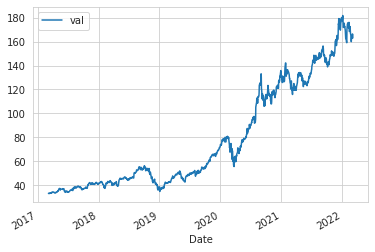

In [ ]:
df.plot.line()

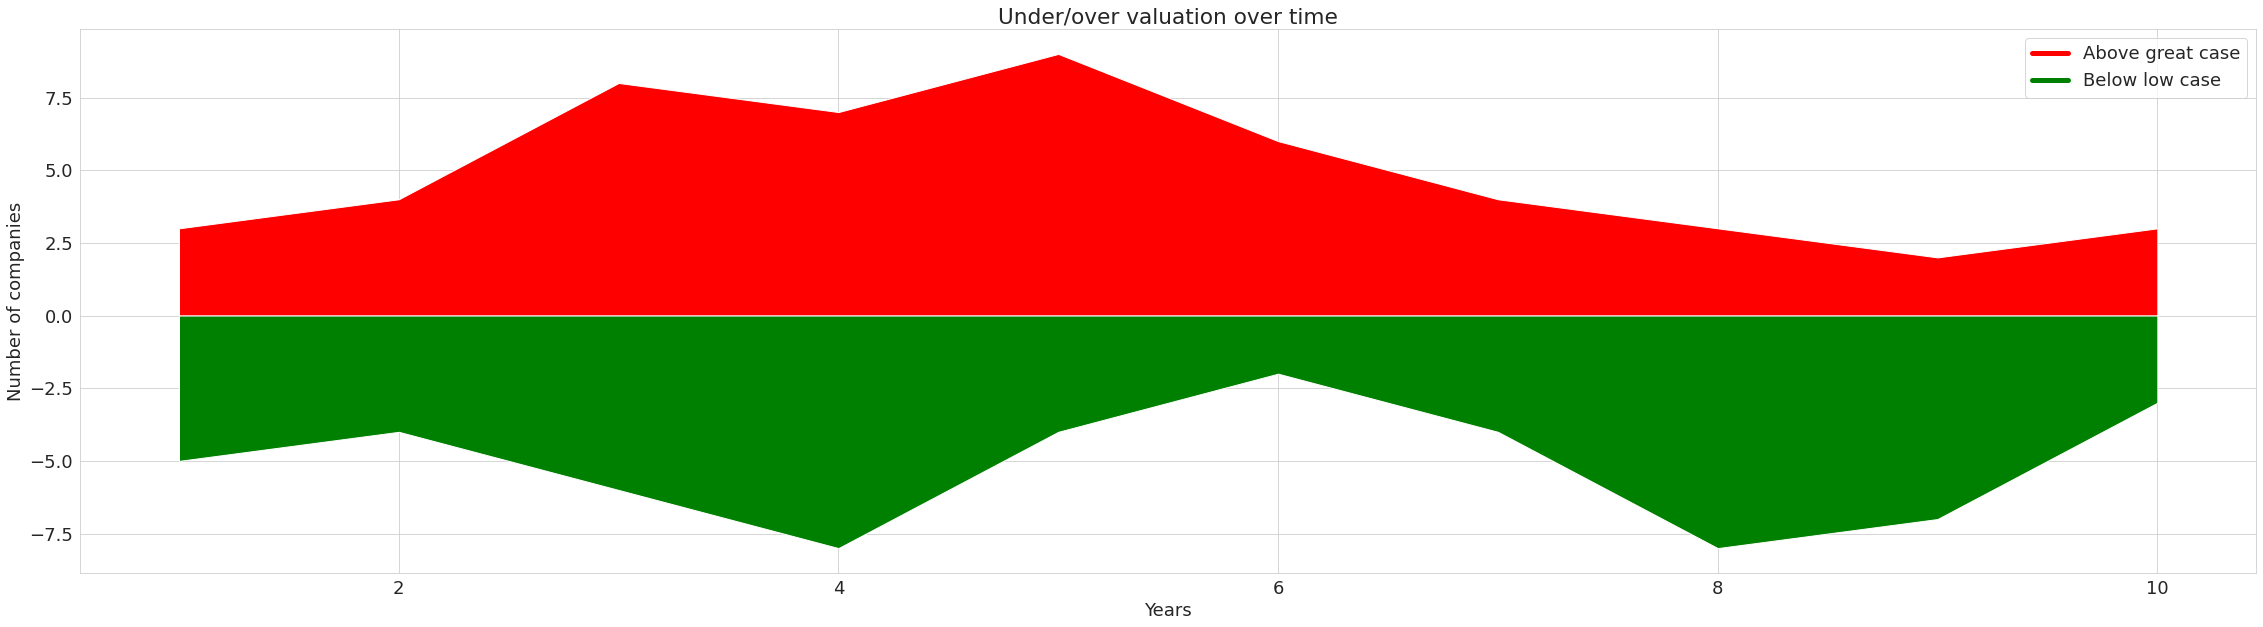

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
time = np.arange(12)
income = np.array([5, 9, 6, 6, 10, 7, 6, 4, 4, 5, 6, 4])
expenses = np.array([6, 6, 8, 3, 6, 9, 7, 8, 6, 6, 4, 8])


x_axis = [1,2,3,4,5,6,7,8,9,10]
cheap = [-5,-4,-6,-8,-4,-2,-4,-8,-7,-3]
expensive = [3,4,8,7,9,6,4,3,2,3]


fig_size = plt.rcParams["figure.figsize"] #set chart size (longer than taller)
fig_size[0] = 39
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 18}) 

plt.stackplot(x_axis, expensive, colors=['r'])
plt.stackplot(x_axis, cheap, colors=['g'])

plt.plot([],[],color='r', label='Above great case', linewidth=5)
plt.plot([],[],color='g', label='Below low case', linewidth=5)
plt.legend()

plt.xlabel('Years')
plt.ylabel('Number of companies')
plt.title('Under/over valuation over time')
plt.show()

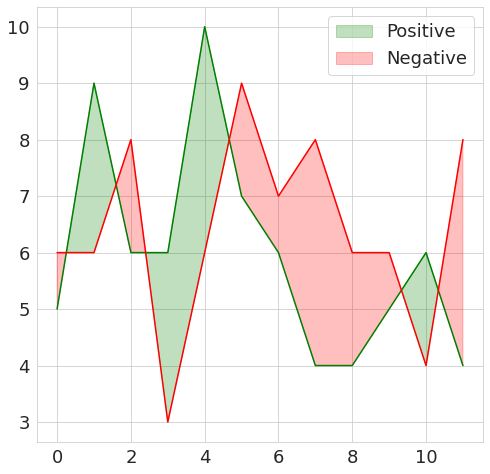

In [ ]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
ax.plot(time, income, color="green")
ax.plot(time, expenses, color="red")

# Fill area when income > expenses with green
ax.fill_between(
    time, income, expenses, where=(income > expenses), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)

# Fill area when income <= expenses with red
ax.fill_between(
    time, income, expenses, where=(income <= expenses), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)

ax.legend();

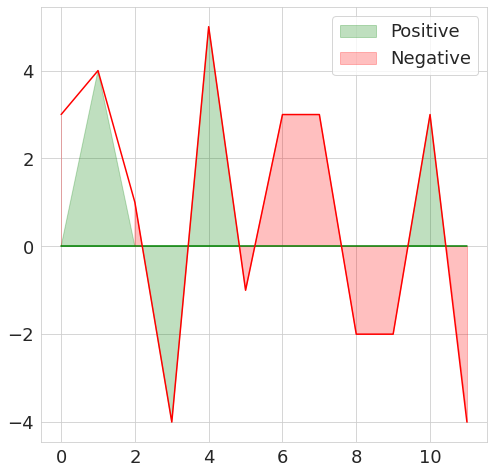

In [ ]:
z1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z2 = np.array([3, 4, 1, -4, 5, -1, 3, 3, -2, -2, 3, -4])
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
ax.plot(time, z1, color="green")
ax.plot(time, z2, color="red")

# Fill area when income > expenses with green
ax.fill_between(
    time, z1, z2, where=(income > expenses), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)

# Fill area when income <= expenses with red
ax.fill_between(
    time, z1, z2, where=(income <= expenses), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)

ax.legend();

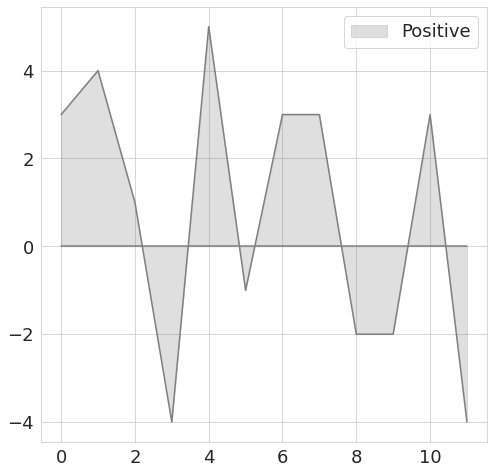

In [ ]:
z1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z2 = np.array([3, 4, 1, -4, 5, -1, 3, 3, -2, -2, 3, -4])
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
ax.plot(time, z1, color="gray")
ax.plot(time, z2, color="gray")

# Fill area when income > expenses with green
ax.fill_between(
    time, z1, z2, 
    interpolate=True, color="gray", alpha=0.25, 
    label="Positive"
)

ax.legend();

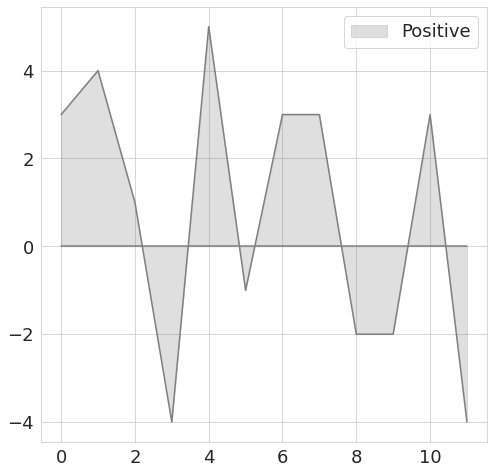

In [ ]:
z1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z2 = np.array([3, 4, 1, -4, 5, -1, 3, 3, -2, -2, 3, -4])
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
ax.plot(z1, color="gray")
ax.plot(z2, color="gray")

# Fill area when income > expenses with green
ax.fill_between(
    time,z1, z2, 
    interpolate=True, color="gray", alpha=0.25, 
    label="Positive"
)

ax.legend();

ValueError: ignored

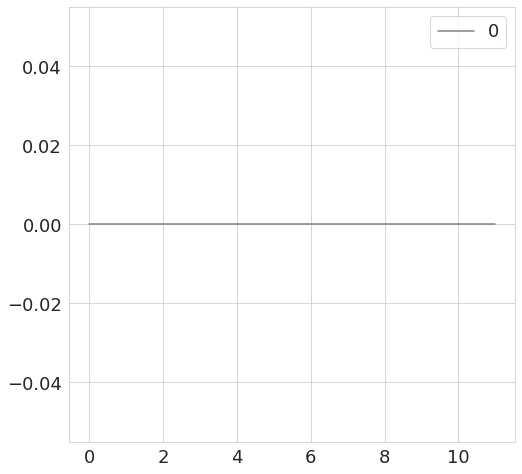

In [ ]:
z1 = pandas.DataFrame(np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
z2 = pandas.DataFrame(np.array([3, 4, 1, -4, 5, -1, 3, 3, -2, -2, 3, -4]))
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
z1.plot.line(color="gray", ax=ax)


# Fill area when income > expenses with green
ax.fill_between(
    z2.index, z1, z2, 
    interpolate=True, color="gray", alpha=0.25
)

ax.legend();

#### scratch

In [ ]:
len(tim.df_orig[3])

160

In [ ]:
130/1258

0.10333863275039745

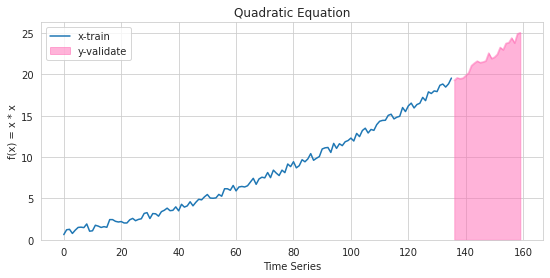

In [ ]:
ax = tim.draw_xy(tim.df_x[3],tim.df_y[3],ylabel="f(x) = x * x",xlabel="Time Series")

In [ ]:
# find if the dataset is "stationary"

In [ ]:
tim.df_x[3].head()

Dislay the multivarible dataset

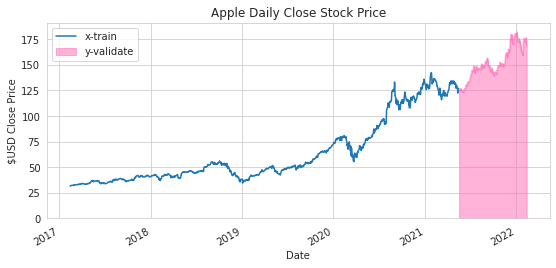

In [ ]:
ax = tim.draw_xy(tim.df_x[0], tim.df_y[0],title="Apple Daily Close Stock Price",ylabel="$USD Close Price")

### Rolling average

In [185]:
#from IPython.core.interactiveshell import no_op
import sklearn
import sklearn.metrics
@add_method(TSBook)
def _rmse(self,x,y):
  return numpy.sqrt(sklearn.metrics.mean_squared_error(x, y))
#
@add_method(TSBook)
def train_rolling_ave(self,x,wind):
  x_hat = x.rolling(window=wind).mean()
  start = wind - 1
  loss_rate = self._rmse(x.iloc[start:], x_hat.iloc[start:])
  return x_hat, loss_rate
#
@add_method(TSBook)
def predict_rolling_ave(self,x,x_hat,y,w):
  hori = len(y)
  y_hat = y.copy()
  ix = x.copy()
  ix_hat = x_hat.copy()
  for i in range(0,hori):
    pred = ix_hat.tail(w).mean()
    y_hat.iat[i,0] = pred
    t = y_hat.iloc[[i]]
    t.rename(columns={"y-validate":"x-train"},inplace=True)
    # add new value
    ix = pandas.concat([ix,t],axis=0)
    pred = ix.tail(w).mean()
    t.iat[0,0] = pred
    ix_hat = pandas.concat([ix_hat, t], axis=0)
  #
  loss_rate = self._rmse(y, y_hat)
  return y_hat, loss_rate
#
@add_method(TSBook)
def forecast_rolling_ave_old(self,x_orig,y_orig=None,y_perc=20,wind=5,is_pred=True,dot_size=150):
  # split, train and predict
  if y_perc is None:
    x = x_orig
    y = y_orig
  else:
    x, y = self._split_xy(x_orig,split_y=y_perc)
  x_hat, xloss_rate = self.train_rolling_ave(x,wind=wind)
  y_hat = None
  #
  # draw graph on train
  row = 1
  col = 2
  canvas, pic = matplotlib.pyplot.subplots(row, col, figsize=(16,6)) 
  ax1 = x_hat.plot.line(ax=pic[0], color="lightgray",linewidth=2, title="Training RMSE = " + str(numpy.round(xloss_rate,4)))
  ax2 = x.reset_index().plot.scatter(ax=ax1,x="Date",y="x-train", color="hotpink",s=dot_size)
  ax3 = x_hat.reset_index().plot.scatter(ax=ax2,x="Date",y="x-train", color="deepskyblue",s=dot_size,alpha=0.75)
  # the predition
  if is_pred is True:
    y_hat, yloss_rate = self.pred_rolling_ave(x,x_hat,y,wind=wind)
    ax4 = y_hat.plot.line(ax=pic[1], color="lightgray",linewidth=2, title="Test RMSE = "+ str(numpy.round(yloss_rate,4)))
    ax5 = y.reset_index().plot.scatter(ax=ax4,x="Date",y="y-validate", color="hotpink",s=dot_size)
    ax6 = y_hat.reset_index().plot.scatter(ax=ax5,x="Date",y="y-validate", color="deepskyblue",s=dot_size,alpha=0.75)
  canvas.show()
  return x,y,x_hat,y_hat
  #


In [186]:
@add_method(TSBook)
def dance_the_rolling_ave(self,x_orig,y_orig=None,y_perc=20,w=5,dot=150):
  # split, train and predict
  if y_perc is None:
    x = x_orig
    y = y_orig
  else:
    x, y = self._split_xy(x_orig,split_y=y_perc)
  x_hat, xloss_rate = self.train_rolling_ave(x,wind=w)
  #
  y_hat, yloss_rate = self.predict_rolling_ave(x,x_hat,y,wind=w)
  return y_hat, yloss_rate
  #

#### baby step

In [238]:
#
@add_method(TSBook)
def take_baby_step(self, df, bsize=40, title=""):
  canvas, pic = matplotlib.pyplot.subplots(1,1, figsize=(12,4))
  x, y = self._split_xy(df.tail(bsize),split_y=20)
  self._draw_xy(x,pic,df_y=y)
  pic.set_title(title)
  canvas.show()
  return x, y

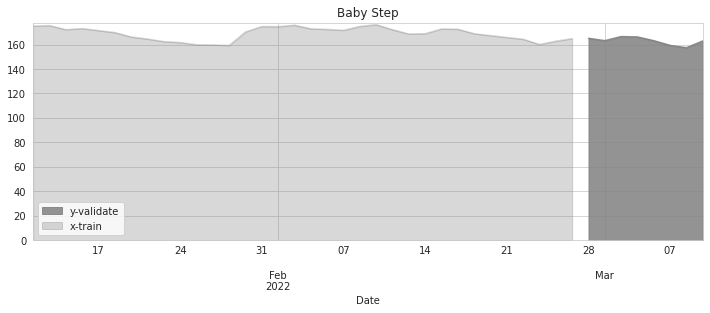

In [239]:
tim.baby_x, tim.baby_y = tim.take_baby_step(tim.df_y[0], title="Baby Step")

In [240]:
#
@add_method(TSBook)
def train_baby_step(self, df, w,title=""):
  canvas, pic = matplotlib.pyplot.subplots(1,1, figsize=(12,4))
  _hat, lrate = self.train_rolling_ave(df,wind=w)
  _hat = pandas.DataFrame(_hat["x-train"].fillna(0))
  #
  _hat.columns = ["x-hat"]
  self._draw_xy(df,pic,df_y=_hat,is_area=False,color="#333333")
  t = title + " | Window: " + str(w) + " | Loss Rate (RMSE): " + str(numpy.round(lrate, 5))
  pic.set_title(t)
  canvas.show()
  return _hat, lrate

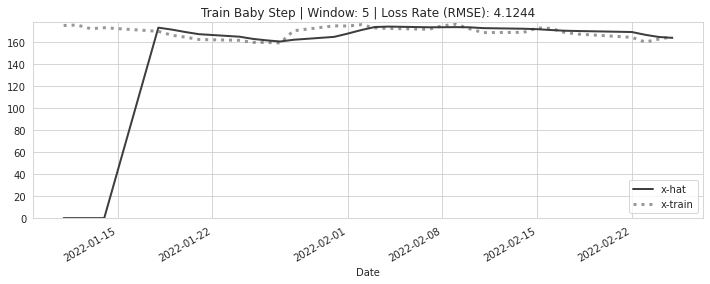

In [241]:
x_hat,x_lr = tim.train_baby_step(tim.baby_x,5,title="Train Baby Step")

In [242]:
#
@add_method(TSBook)
def _double_check(self, x,x_hat):
  n = x_hat.copy()
  n.columns = ["x-hat"]
  z = pandas.concat([x, n],axis=1)
  display(z.head(10))
  return 

In [243]:
tim._double_check(tim.baby_x, x_hat)

,x-train,x-hat
Date,,
2022-01-11,175.08,0.000
2022-01-12,175.53,0.000
2022-01-13,172.19,0.000
2022-01-14,173.07,0.000
2022-01-18,169.80,173.134
2022-01-19,166.23,171.364
2022-01-20,164.51,169.160
2022-01-21,162.41,167.204
2022-01-24,161.62,164.914


In [244]:
y_hat, yloss = tim.predict_rolling_ave(tim.baby_x, x_hat, tim.baby_y, w=5)
print (yloss)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ValueError: ignored

In [161]:
tim.baby_y.reset_index?

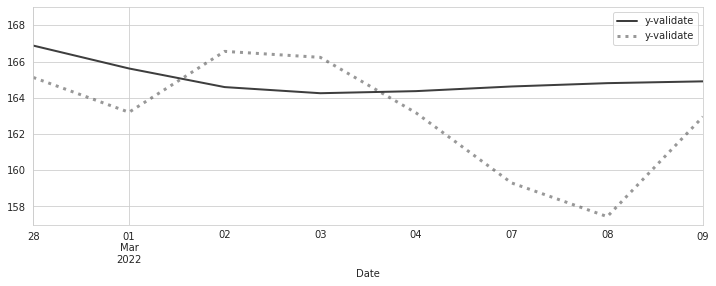

In [219]:
canvas, pic = matplotlib.pyplot.subplots(1,1, figsize=(12,4))
tim._draw_xy(tim.baby_y, pic, df_y=y_hat,is_area=False,color="#333333")
canvas.show()

#### scratch

In [113]:
y_hat.head()

,y-validate
Date,
2022-02-28,166.878000
2022-03-01,165.616320
2022-03-02,164.588893
2022-03-03,164.251021
2022-03-04,164.365991


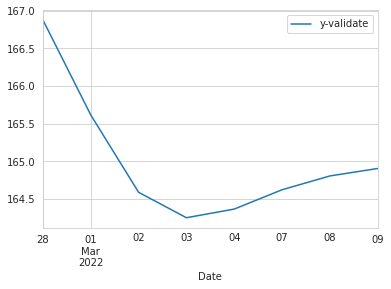

In [142]:
y_hat.plot.line()

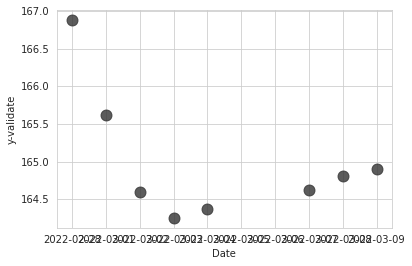

In [159]:
y_hat.reset_index().plot.scatter(x="Date",y="y-validate",color="#333333", s=120, alpha=0.8)

In [ ]:
x.reset_index()

,Date,x-train
0,2022-02-08,0.0000
1,2022-02-09,0.0000
2,2022-02-10,0.0000
3,2022-02-11,172.9675
4,2022-02-14,171.4800
5,2022-02-15,170.6075
6,2022-02-16,170.7150
7,2022-02-17,170.7750
8,2022-02-18,170.3800
9,2022-02-22,168.2625


In [ ]:
x.head()

,x-train
Date,
2022-02-08,0.0000
2022-02-09,0.0000
2022-02-10,0.0000
2022-02-11,172.9675
2022-02-14,171.4800


In [ ]:
tim.baby_x_hat.head()

,x-train
Date,
2022-02-08,0.0000
2022-02-09,0.0000
2022-02-10,0.0000
2022-02-11,172.9675
2022-02-14,171.4800


In [ ]:
tim.baby_x_hat = pandas.DataFrame(tim.baby_x_hat["x-train"].fillna(0))

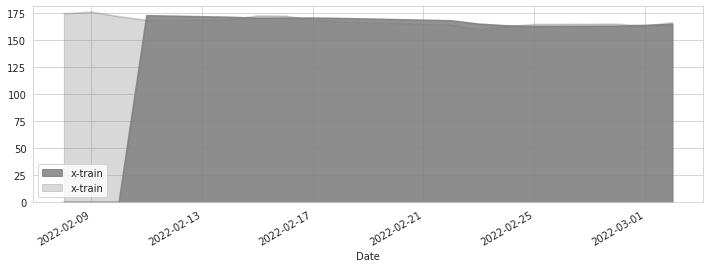

In [ ]:
canvas, pic = matplotlib.pyplot.subplots(1,1, figsize=(12,4))
tim._draw_area(tim.baby_x,pic,df_y=tim.baby_x_hat)

In [ ]:
df_roll = tim.df_x[0].tail(25)
df_roll.head(2)

,x-train
Date,
2021-05-03,131.93
2021-05-04,127.25


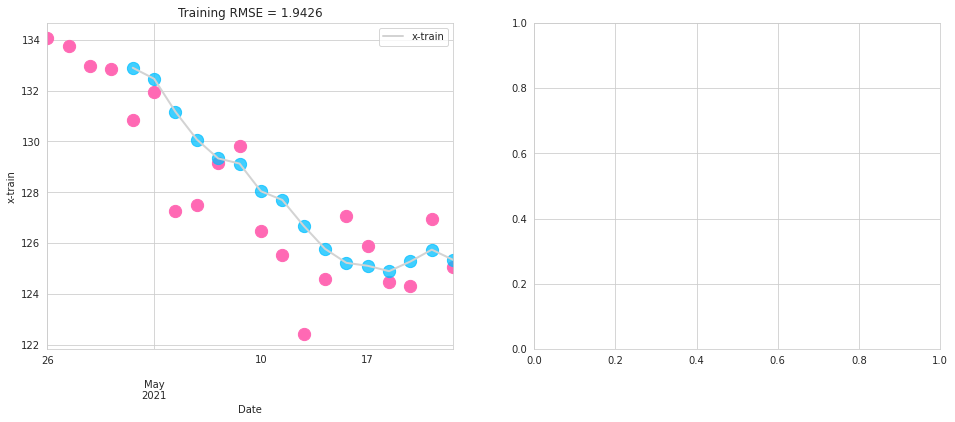

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(df_roll, y_perc=20,wind=5,is_pred=False)

In [ ]:
pandas.options.mode.chained_assignment = None

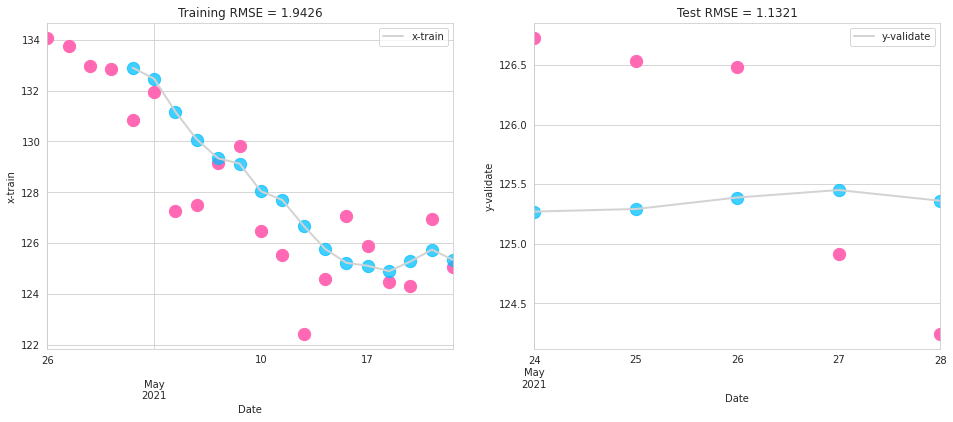

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(df_roll, y_perc=20,wind=5)

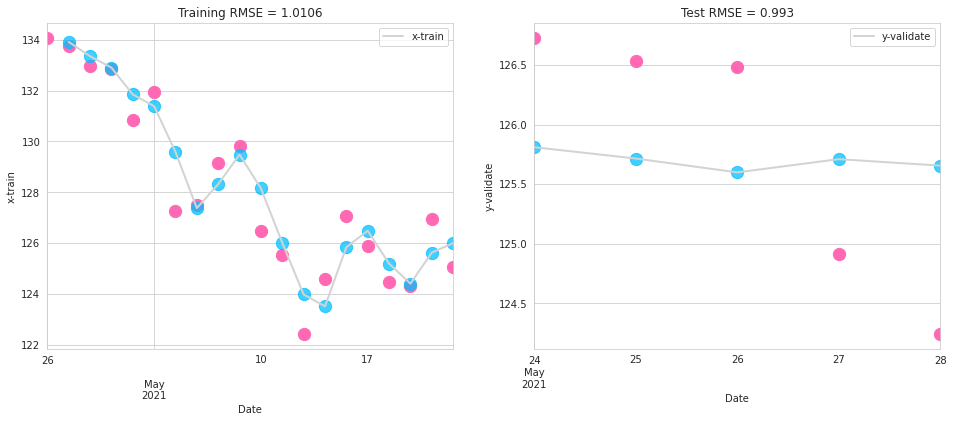

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(df_roll, y_perc=20,wind=2)

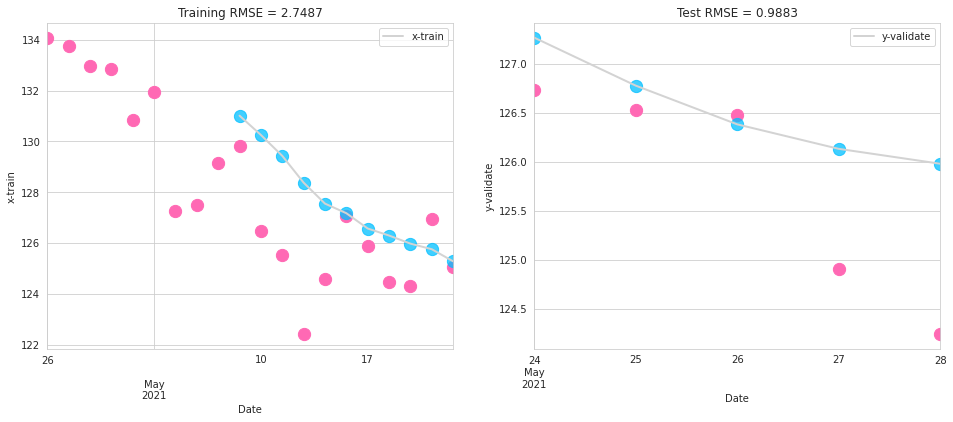

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(df_roll, y_perc=20,wind=10)

### warp speed

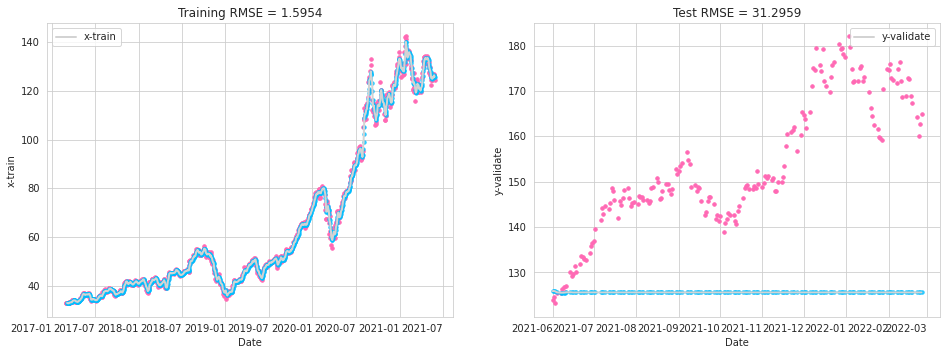

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[0], y_orig=tim.df_y[0], y_perc=None,wind=5,dot_size=12)

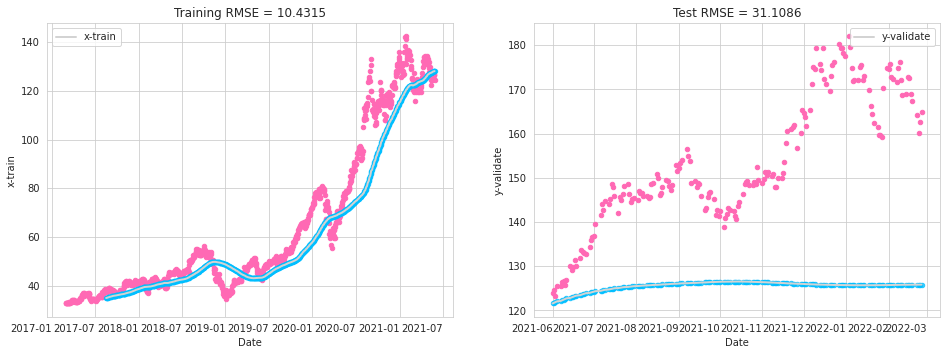

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[0], y_orig=tim.df_y[0], y_perc=None,wind=120,dot_size=20)

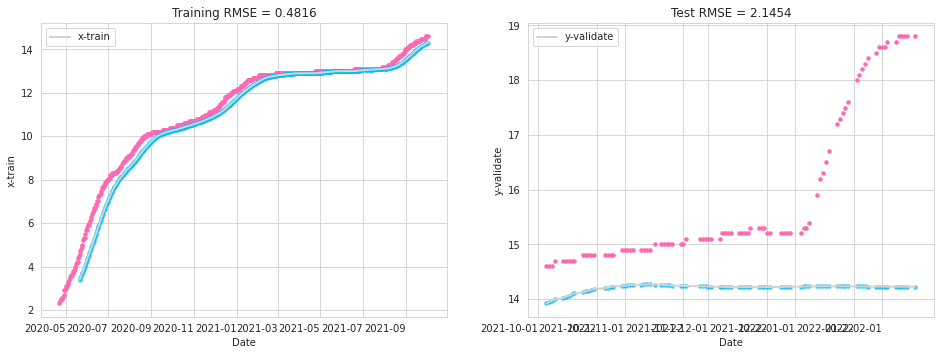

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[1], y_orig=tim.df_y[1], y_perc=None,wind=30,dot_size=12)

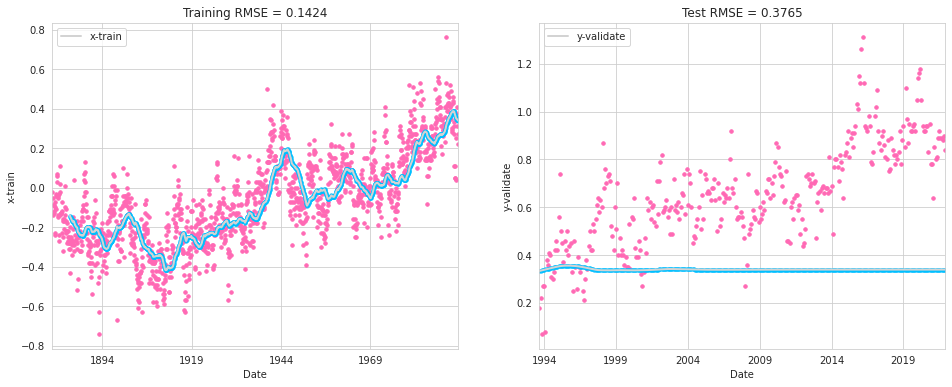

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[2], y_orig=tim.df_y[2], y_perc=None,wind=60,dot_size=12)

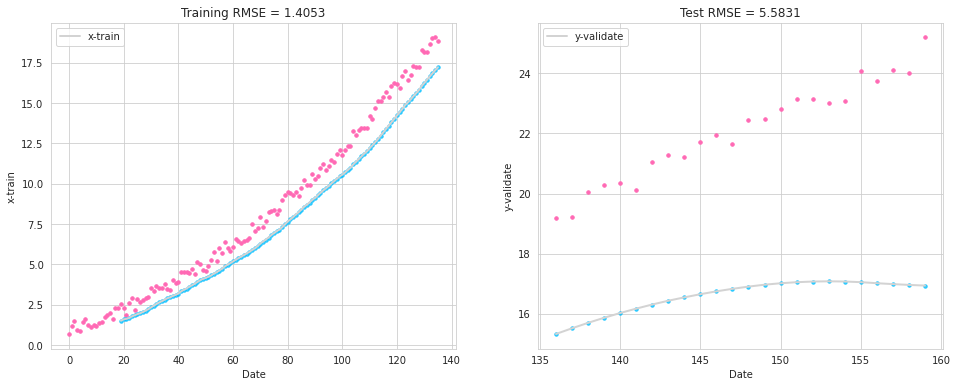

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[3], y_orig=tim.df_y[3], y_perc=None,wind=20,dot_size=12)

### Reduce horizon

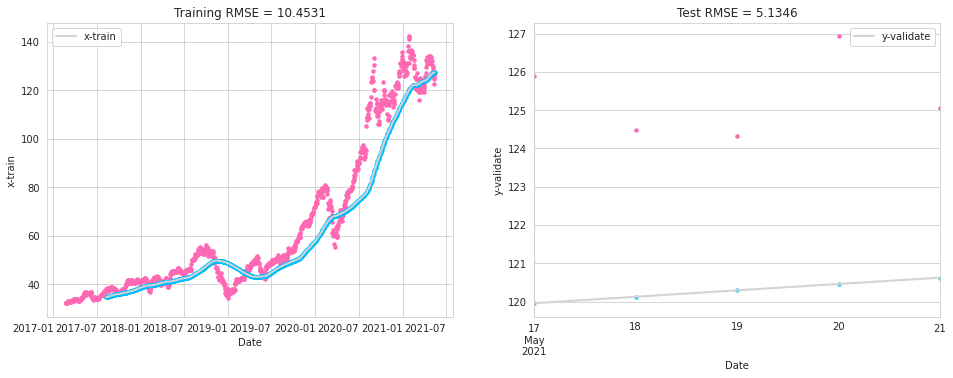

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[0], y_perc=0.5,wind=120,dot_size=12)

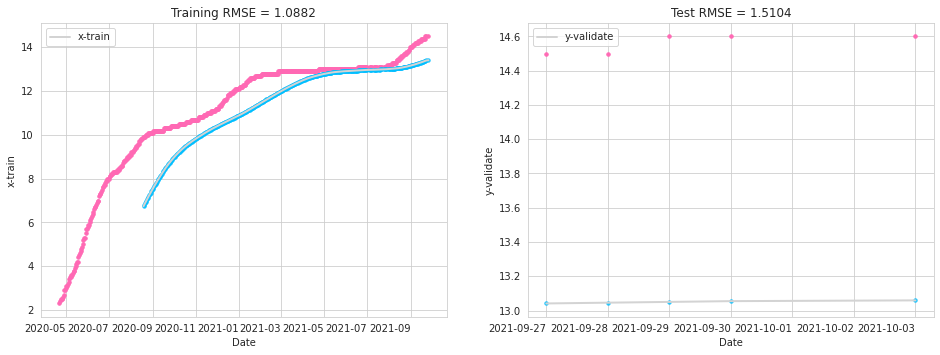

In [ ]:
x,y,x_hat,y_hat = tim.forecast_rolling_ave(x_orig=tim.df_x[1], y_perc=1,wind=120,dot_size=12)

#### scratch

In [ ]:
df = pandas.DataFrame([1,2,3,4,5,5,4,3,2,1], dtype=float)
x, y = tim._split_xy(df,split_y=20)

In [ ]:
iwind = 4
x_hat, xloss = tim.train_rolling_ave(x,wind=iwind)

In [ ]:
display(x)
display(x_hat)
print(xloss)

,x-train
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,5.0
6,4.0
7,3.0


,x-train
0,NaN
1,NaN
2,2.000000
3,3.000000
4,4.000000
5,4.666667
6,4.666667
7,4.000000


0.8713548411865623


In [ ]:
numpy.mean([4.667,4,3.81])

4.159

In [ ]:
numpy.mean([4,3,4.44])

3.813333333333334

In [ ]:
y_hat, yloss = tim.pred_rolling_ave(x.tail(iwind),x_hat.tail(iwind),y,wind=iwind)
display(y_hat)
print(yloss)
# 3 = 2.8, # 3.7

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,y-validate
8,4.125000
9,4.257812


2.7503606386396178


In [ ]:
y

,y-validate
8,2.0
9,1.0


In [ ]:
x_hat

,x-train
0,NaN
1,NaN
2,2.000000
3,3.000000
4,4.000000
5,4.666667
6,4.666667
7,4.000000


In [ ]:
df_y

,y-validate
8,2.0
9,1.0


In [ ]:
df_x, df_y = tim._split_xy(tim.df_x[0].tail(25),split_y=20.0)

In [ ]:
tim.pred_rolling_ave(df_x, df_y, 5)

TypeError: ignored

In [ ]:
len(df_x)

20

In [ ]:
df_x, df_y = tim._split_xy(tim.df_x[0].tail(25),split_y=20.0)

In [ ]:
df_x.tail()

,x-train
Date,
2021-05-04,127.25
2021-05-05,127.50
2021-05-06,129.14
2021-05-07,129.83
2021-05-10,126.48


In [ ]:
df_y.head(20)

,y-validate
Date,
2021-05-11,125.54
2021-05-12,122.41
2021-05-13,124.60
2021-05-14,127.07
2021-05-17,125.90


In [ ]:
df_xy = pandas.concat([df_x,df_y])

In [ ]:
df_xy

,x-train
Date,
2021-04-12,130.63
2021-04-13,133.80
2021-04-14,131.42
2021-04-15,133.87
2021-04-16,133.54
2021-04-19,134.21
2021-04-20,132.49
2021-04-21,132.88
2021-04-22,131.33


In [ ]:
tim.df_small.iat[1,0] = 10.0

In [ ]:
tim.df_small.head()

,x-train
Date,
2021-04-19 00:00:00,134.21
2021-04-20 00:00:00,10.00
2021-04-21 00:00:00,132.88
2021-04-22 00:00:00,131.33
2021-04-23 00:00:00,133.69


In [ ]:
tim.df_small.tail(5).mean()

x-train    125.22
dtype: float64

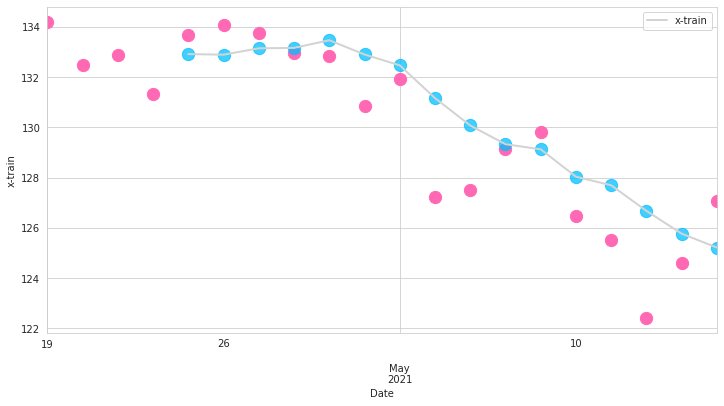

In [ ]:
#
df = tim.df_small.rolling(window=5).mean()
ax1 = df.plot.line(color="lightgray",linewidth=2)
ax2 = tim.df_small.reset_index().plot.scatter(ax=ax1,x="Date",y="x-train", color="hotpink",figsize=(12,6),s=150)
ax3 = df.reset_index().plot.scatter(ax=ax2,x="Date",y="x-train", color="deepskyblue",s=150,alpha=0.75)
matplotlib.pyplot.show()

In [ ]:
df.head(20)

,x-train
Date,
2021-04-19,NaN
2021-04-20,NaN
2021-04-21,NaN
2021-04-22,NaN
2021-04-23,132.920
2021-04-26,132.896
2021-04-27,133.150
2021-04-28,133.166
2021-04-29,133.472


In [ ]:
import sklearn
import sklearn.metrics
tim.df_small.iloc[0:5].mean()

x-train    132.92
dtype: float64

In [ ]:
numpy.sqrt(sklearn.metrics.mean_squared_error(tim.df_small.iloc[4:], df.iloc[4:]))

1.9361683165468881

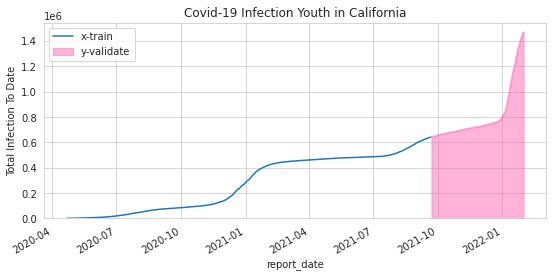

In [ ]:
ax = tim.draw_xy(tim.df_x[1], tim.df_y[1],title="Covid-19 Infection Youth in California",ylabel="Total Infection To Date")

In [ ]:
tim.df_orig[1].head()

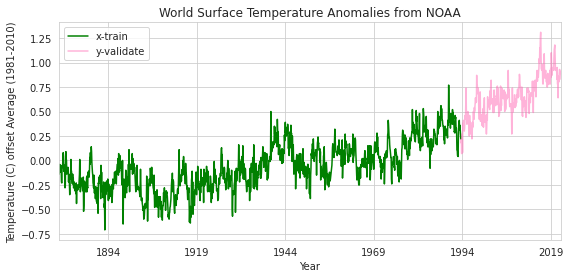

In [ ]:
ax = tim.draw_xy_line(tim.df_x[2], tim.df_y[2],title="World Surface Temperature Anomalies from NOAA",ylabel="Temperature (C) offset Average (1981-2010)")


#### scratch end

- check for stationary

In [ ]:
# < 0.05 is stationary
import statsmodels
import statsmodels.tsa
import statsmodels.tsa.stattools
@add_method(TSBook)
def is_stationary_adf(self, data):
  adf = statsmodels.tsa.stattools.adfuller(data)
  is_stat = False
  if (adf[1] <= 0.05):
    is_stat = True
  return is_stat, adf
#
@add_method(TSBook)
def print_stationary_adf(self):
  iname = ["Apple Stock Price", "Covid 19", "Global Warming", "[Rocket] Quadratic"]
  self._ph()
  for i in range(4):
    is_stat, adf = self.is_stationary_adf(self.df_x[i].iloc[:,0])
    self._pp(iname[i] + " is stationary", is_stat)
    self._pp("The P-value is", adf[1])
    self._ph()
  return

In [ ]:
tim.print_stationary_adf()

---------------------------------------- : ----------------------------------------
         Apple Stock Price is stationary : False
                          The P-value is : 0.9543914235400301
---------------------------------------- : ----------------------------------------
                  Covid 19 is stationary : False
                          The P-value is : 0.12494152810030901
---------------------------------------- : ----------------------------------------
            Global Warming is stationary : False
                          The P-value is : 0.236396357909535
---------------------------------------- : ----------------------------------------
        [Rocket] Quadratic is stationary : False
                          The P-value is : 1.0
---------------------------------------- : ----------------------------------------


In [ ]:
#
import statsmodels
import statsmodels.api
import matplotlib
@add_method(TSBook)
def draw_seasonal_decompose(self, df,model="additive", freq=3,title="Seasonal Graphs"):
  #df = tim.df_x[0].iloc[:,0]
  sea = statsmodels.api.tsa.seasonal_decompose(df, model=model,freq=freq) 
  canvas, pic = matplotlib.pyplot.subplots(2, 2, figsize=(18,10)) 
  sea.observed.plot(ax=pic[0,0], legend=False)
  pic[0][0].set_ylabel('Observed')
  sea.trend.plot(ax=pic[1][0], legend=False)
  pic[1][0].set_ylabel('Trend')
  sea.seasonal.plot(ax=pic[0][1], legend=False)
  pic[0][1].set_ylabel('Seasonal')
  sea.resid.plot(ax=pic[1][1], legend=False)
  pic[1][1].set_ylabel('Residual')
  pic[0][0].set_title(title)
  canvas.show()
  return


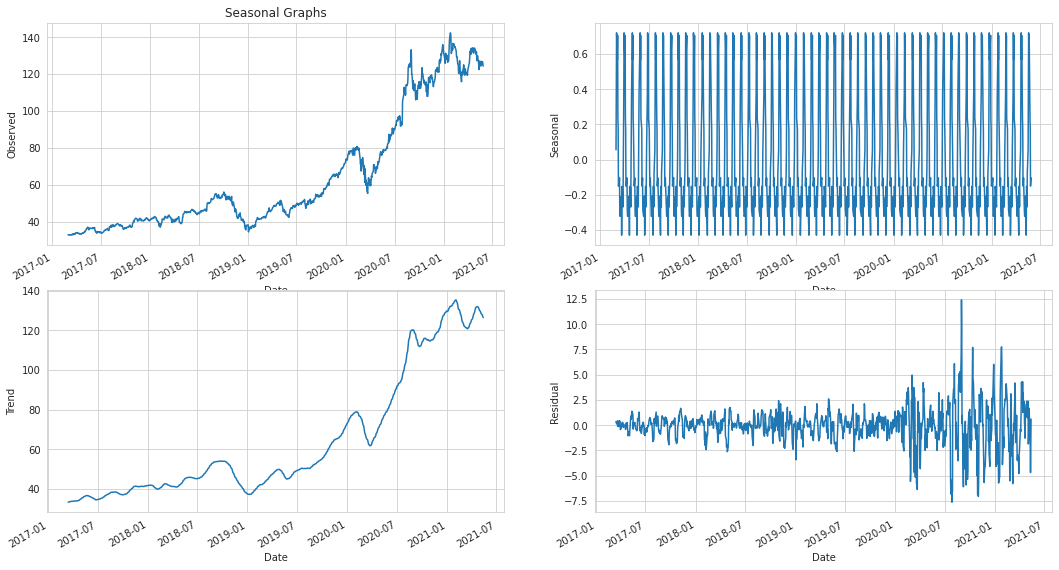

In [ ]:
tim.draw_seasonal_decompose(tim.df_x[0].iloc[:,0],freq=20)

### find p-d-q

In [ ]:
#find the "p" using autocorrlation graph

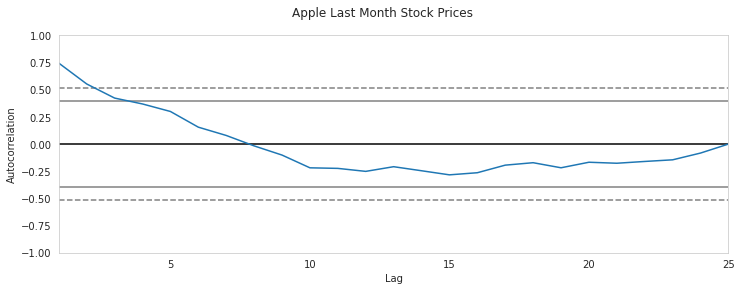

In [ ]:
matplotlib.pyplot.figure(figsize = (12,4))
pandas.plotting.autocorrelation_plot(df_roll)
matplotlib.pyplot.suptitle('Apple Last Month Stock Prices')
matplotlib.pyplot.show()
# p = 4

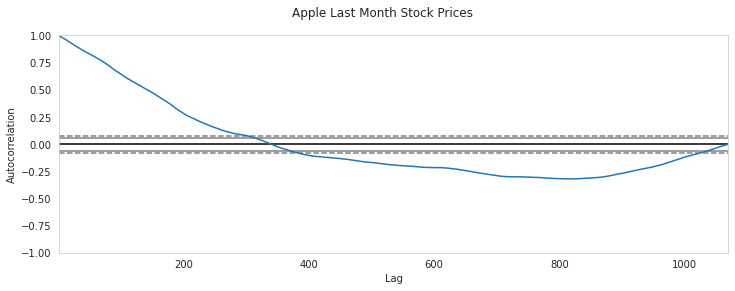

In [ ]:
matplotlib.pyplot.figure(figsize = (12,4))
pandas.plotting.autocorrelation_plot(tim.df_x[0])
matplotlib.pyplot.suptitle('Apple Last Month Stock Prices')
matplotlib.pyplot.show()

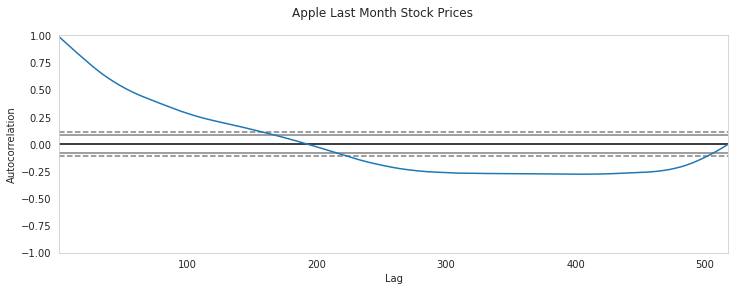

In [ ]:
matplotlib.pyplot.figure(figsize = (12,4))
pandas.plotting.autocorrelation_plot(tim.df_x[1])
matplotlib.pyplot.suptitle('Apple Last Month Stock Prices')
matplotlib.pyplot.show()

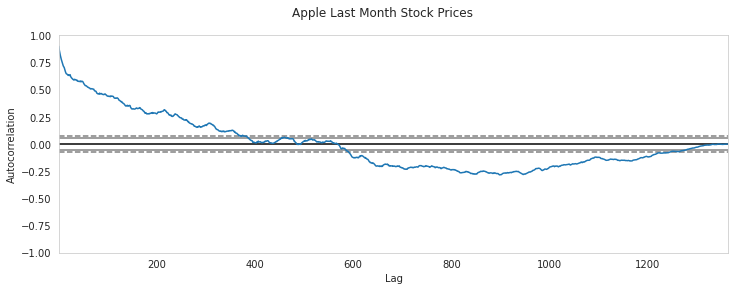

In [ ]:
matplotlib.pyplot.figure(figsize = (12,4))
pandas.plotting.autocorrelation_plot(tim.df_x[2])
matplotlib.pyplot.suptitle('Apple Last Month Stock Prices')
matplotlib.pyplot.show()

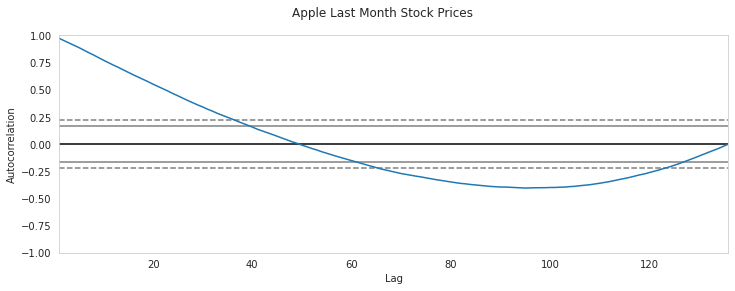

In [ ]:
matplotlib.pyplot.figure(figsize = (12,4))
pandas.plotting.autocorrelation_plot(tim.df_x[3])
matplotlib.pyplot.suptitle('Apple Last Month Stock Prices')
matplotlib.pyplot.show()

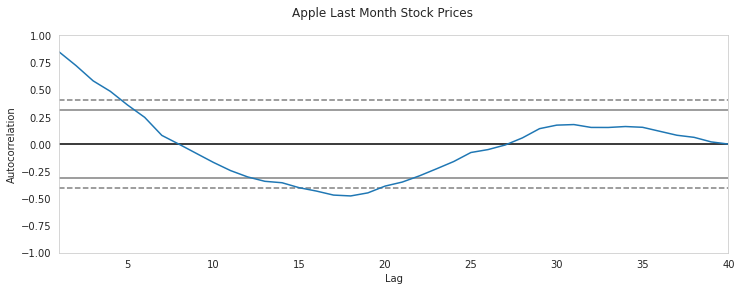

In [ ]:
matplotlib.pyplot.figure(figsize = (12,4))
pandas.plotting.autocorrelation_plot(tim.df_x[0].tail(40))
matplotlib.pyplot.suptitle('Apple Last Month Stock Prices')
matplotlib.pyplot.show()

In [ ]:
fig = matplotlib.pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

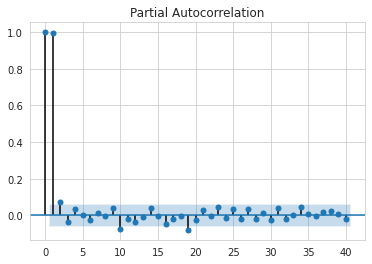

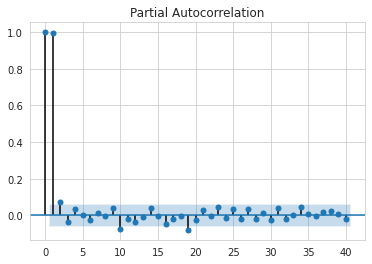

In [ ]:
statsmodels.api.graphics.tsa.plot_pacf(tim.df_x[0], lags=40)
#q = value 2

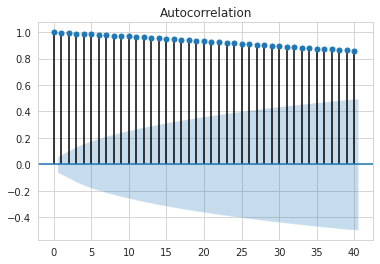

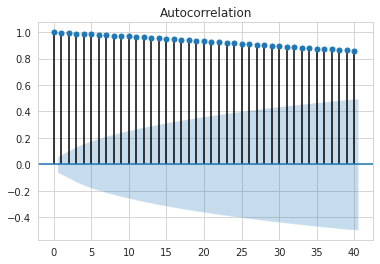

In [ ]:
statsmodels.api.graphics.tsa.plot_acf(tim.df_x[0], lags=40)

### ARIMA(real)

In [ ]:
df_roll.head()

,x-train
Date,
2021-04-26,134.09
2021-04-27,133.76
2021-04-28,132.96
2021-04-29,132.86
2021-04-30,130.85


In [ ]:
import statsmodels
import statsmodels.api
#
@add_method(TSBook)
def forecast_arima(self,train,test,is_verbose=True,order=(5,1,0),title="",is_dot=False):
  history = [x for x in train]
  predictions = list()
  # walk-forward validation
  for t in range(len(test)):
    model = statsmodels.api.tsa.ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    observation = test[t]
    history.append(observation)
    if (is_verbose is True):
      self._pp("Predicted", y_hat)
      self._pp("Observation", observation)
  # evaluate forecasts
  loss = self.find_rmse(test, predictions)
  # draw plot forecasts against actual outcomes
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(16,6)) 
  ptest = pandas.DataFrame(test)
  ppred = pandas.DataFrame(predictions)
  self.draw_forecast(ptest,ppred,pic=pic,title=title,is_dot=is_dot,y_color="lightgray")
  canvas.show()
  return predictions

In [ ]:
df_x, df_y = tim._split_xy(df_roll,split_y=20)
df_y.head(10)

,y-validate
Date,
2021-05-24,126.73
2021-05-25,126.53
2021-05-26,126.48
2021-05-27,124.91
2021-05-28,124.24


                               Predicted : [123.77297114]
                             Observation : 126.73
                               Predicted : [124.6357622]
                             Observation : 126.53
                               Predicted : [126.02047541]
                             Observation : 126.48
                               Predicted : [125.34405137]
                             Observation : 124.91
                               Predicted : [124.77821312]
                             Observation : 124.24


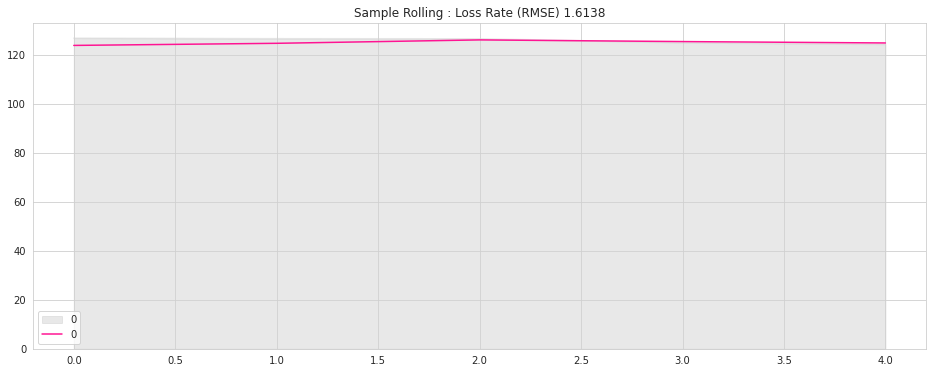

In [ ]:
y_hat = tim.forecast_arima(df_x["x-train"].values,df_y["y-validate"].values, title="Sample Rolling :",is_dot=False)
# default (5,1,0) = 2.2263

####scratch

In [ ]:
y_hat = tim.forecast_arima(df_x["x-train"].values,df_y["y-validate"].values, title="Sample Rolling :",is_dot=False,order=(5,1,2))

                               Predicted : [123.74130187]
                             Observation : 126.73


LinAlgError: ignored

In [ ]:
y5 = pandas.DataFrame(y_hat)
y5

,0
0,126.943892
1,124.020592
2,122.800743
3,123.180380
4,126.183454


####Scratch End

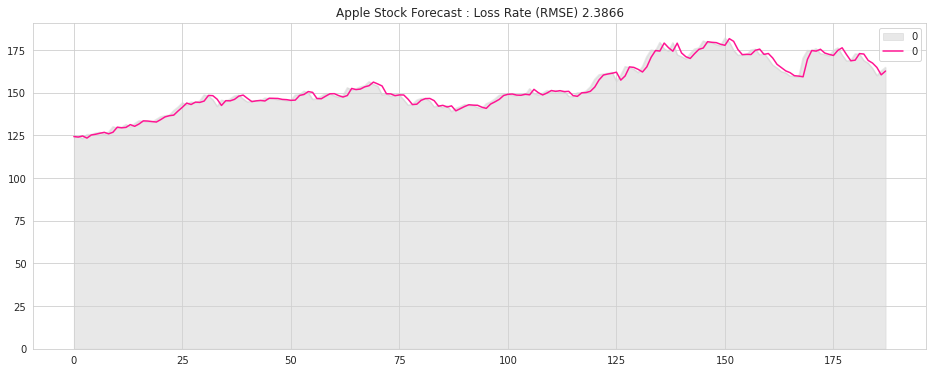

In [ ]:
yhat = tim.forecast_arima(tim.df_x[0]["x-train"].values,tim.df_y[0]["y-validate"].values, is_verbose=False, title="Apple Stock Forecast :")

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


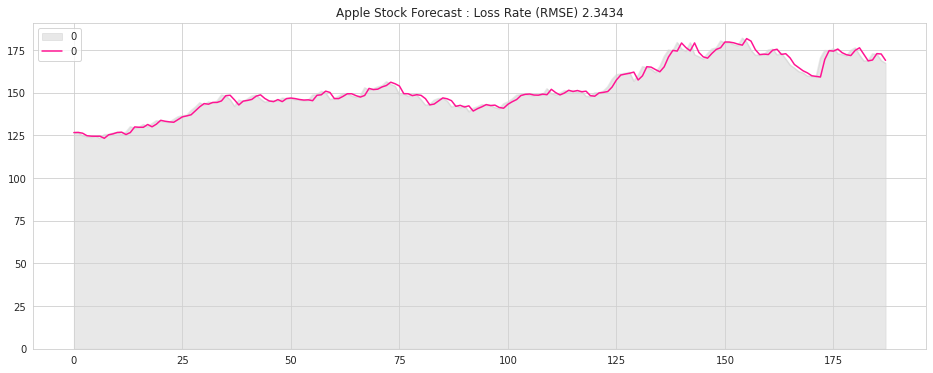

In [ ]:
yhat = tim.forecast_arima(tim.df_x[0]["x-train"].values,tim.df_y[0]["y-validate"].values, is_verbose=False, title="Apple Stock Forecast :",order=(5,1,2))

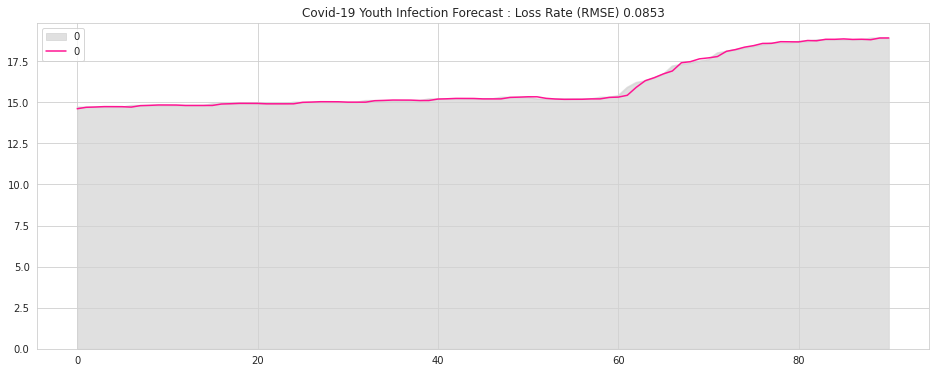

In [ ]:
tim.forecast_arima(tim.df_x[1]["x-train"].values,tim.df_y[1]["y-validate"].values, is_verbose=False, title="Covid-19 Youth Infection Forecast :")

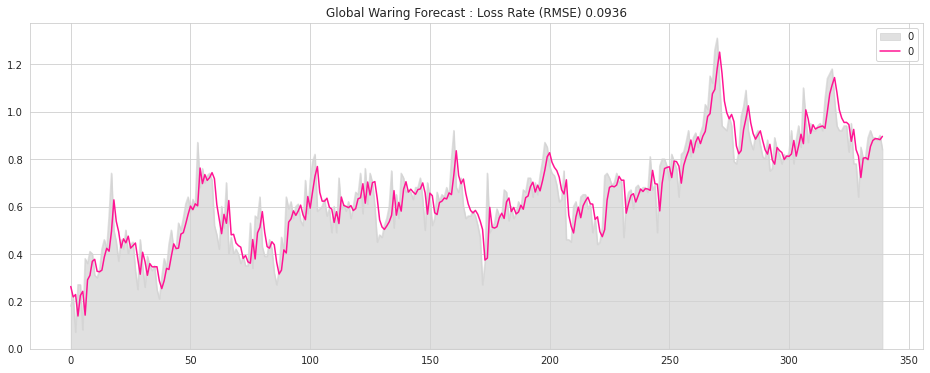

In [ ]:
tim.forecast_arima(tim.df_x[2]["x-train"].values,tim.df_y[2]["y-validate"].values, is_verbose=False, title="Global Waring Forecast :")

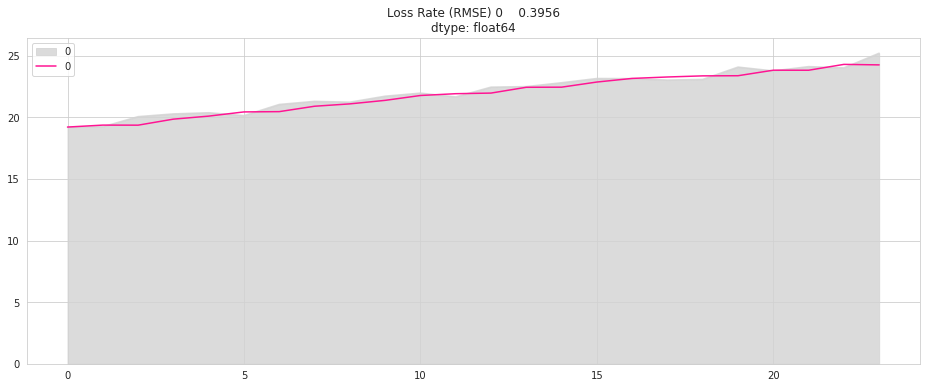

In [ ]:
tim.forecast_arima(tim.df_x[3]["x-train"].values,tim.df_y[3]["y-validate"].values, is_verbose=False)

In [ ]:
#

#### scratch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


predicted=126.943892, expected=125.900000
predicted=124.020592, expected=124.480000
predicted=122.800743, expected=124.320000
predicted=123.180380, expected=126.930000
predicted=126.183454, expected=125.060000
Test RMSE: 1.946


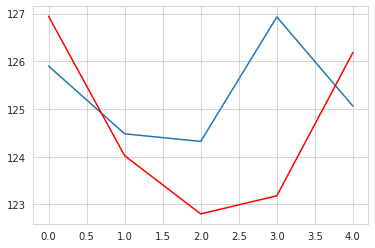

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
import statsmodels
import statsmodels.api
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# # load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('./shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series.index = series.index.to_period('M')
# # split into train and test sets
# X = series.values
# size = int(len(X) * 0.66)
# #
# train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = statsmodels.api.tsa.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
train = tim.df_x[0]["x-train"].values
test = tim.df_y[0]["y-validate"].values
test

array([126.73, 126.53, 126.48, 124.91, 124.24, 123.91, 124.69, 123.18,
       125.52, 125.53, 126.37, 126.76, 125.74, 126.97, 130.09, 129.26,
       129.77, 131.4 , 130.07, 131.91, 133.59, 133.31, 133.02, 132.72,
       134.38, 135.93, 136.56, 136.86, 139.55, 141.6 , 144.14, 142.82,
       144.68, 144.07, 145.21, 148.71, 148.04, 145.96, 142.03, 145.72,
       144.97, 146.37, 148.12, 148.55, 146.34, 144.55, 145.21, 145.43,
       145.09, 146.93, 146.52, 146.63, 145.93, 145.88, 145.39, 145.65,
       148.67, 148.88, 150.9 , 149.97, 146.15, 146.49, 147.97, 149.49,
       149.4 , 148.14, 147.32, 148.38, 152.9 , 151.61, 152.29, 153.43,
       154.08, 156.46, 154.88, 153.85, 148.75, 149.33, 147.9 , 148.81,
       148.57, 145.85, 142.73, 143.22, 145.64, 146.62, 146.71, 145.16,
       141.7 , 142.62, 141.29, 142.44, 138.94, 140.9 , 141.79, 143.08,
       142.69, 142.6 , 141.3 , 140.7 , 143.55, 144.63, 146.34, 148.54,
       149.04, 149.26, 148.47, 148.42, 149.1 , 148.63, 152.35, 149.58,
      

predicted=125.418484, expected=126.730000
predicted=126.527742, expected=126.530000
predicted=126.737137, expected=126.480000
predicted=126.550506, expected=124.910000
predicted=125.199271, expected=124.240000
predicted=124.387883, expected=123.910000
predicted=124.059366, expected=124.690000
predicted=124.690076, expected=123.180000
predicted=123.465820, expected=125.520000
predicted=125.280604, expected=125.530000
predicted=125.710564, expected=126.370000
predicted=126.310973, expected=126.760000
predicted=126.837581, expected=125.740000
predicted=125.958215, expected=126.970000
predicted=126.891623, expected=130.090000
predicted=129.869523, expected=129.260000
predicted=129.496024, expected=129.770000
predicted=129.732545, expected=131.400000
predicted=131.354946, expected=130.070000
predicted=130.359793, expected=131.910000
predicted=131.729788, expected=133.590000
predicted=133.559897, expected=133.310000
predicted=133.451632, expected=133.020000
predicted=133.129219, expected=132

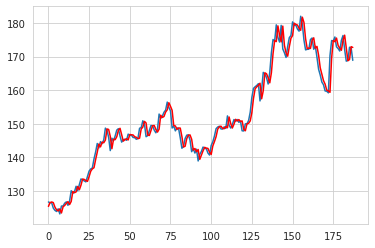

In [ ]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = statsmodels.api.tsa.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
train = tim.df_x[3]["x-train"].values
test = tim.df_y[3]["y-validate"].values
test

array([19.74980823, 19.43826151, 19.90240126, 19.60482114, 20.5446744 ,
       20.09375816, 20.59041491, 21.21019391, 21.17603822, 21.31147722,
       21.79838366, 21.56994786, 22.56720349, 22.01292598, 22.82120521,
       23.0672932 , 23.10561447, 23.5997213 , 23.71187257, 24.13657153,
       24.24199563, 24.37500926, 24.49145849, 24.43826393])

predicted=19.490301, expected=19.749808
predicted=19.813688, expected=19.438262
predicted=19.829661, expected=19.902401
predicted=20.006167, expected=19.604821
predicted=19.976834, expected=20.544674
predicted=20.293286, expected=20.093758
predicted=20.375108, expected=20.590415
predicted=20.566903, expected=21.210194
predicted=20.982117, expected=21.176038
predicted=21.233489, expected=21.311477
predicted=21.394499, expected=21.798384
predicted=21.760004, expected=21.569948
predicted=21.838219, expected=22.567203
predicted=22.234680, expected=22.012926
predicted=22.363444, expected=22.821205
predicted=22.645900, expected=23.067293
predicted=23.007707, expected=23.105614
predicted=23.243628, expected=23.599721
predicted=23.497602, expected=23.711873
predicted=23.835799, expected=24.136572
predicted=24.090513, expected=24.241996
predicted=24.339244, expected=24.375009
predicted=24.545547, expected=24.491458
predicted=24.673439, expected=24.438264
Test RMSE: 0.339


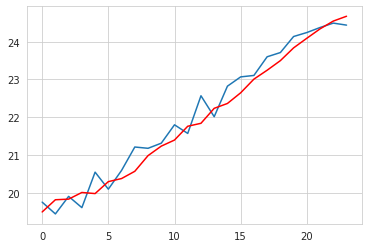

In [ ]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = statsmodels.api.tsa.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### scratch

In [ ]:
df = tim.df_y[3].rolling(window=5,).mean()
df.fillna(0,inplace=True)
df.head()

,y-validate
136,0.000000
137,0.000000
138,0.000000
139,0.000000
140,20.001177


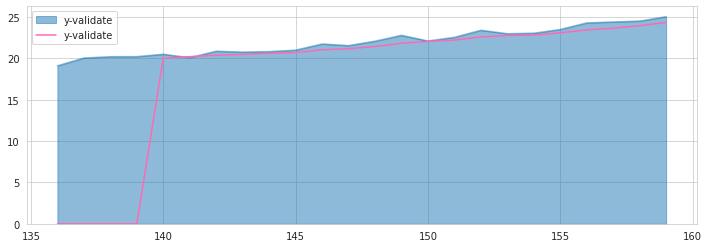

In [ ]:
ax = tim.df_y[3].plot.area(alpha=0.5,figsize=(12,4))
df.plot.line(ax=ax,color="hotpink")

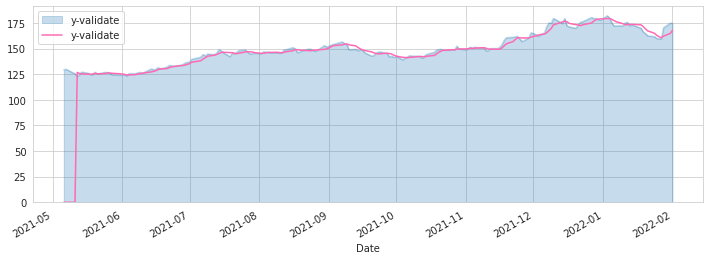

In [ ]:
df = tim.df_y[0].rolling(window=5).mean()
df.fillna(0,inplace=True)
ax = tim.df_y[0].plot.area(alpha=0.25,figsize=(12,4))
ax2 = df.plot.line(ax=ax,color="hotpink")

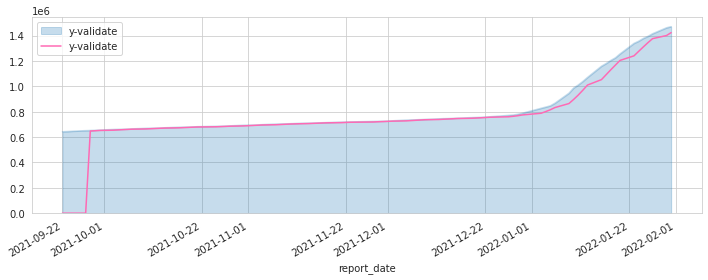

In [ ]:
df = tim.df_y[1].rolling(window=5).mean()
df.fillna(0,inplace=True)
ax = tim.df_y[1].plot.area(alpha=0.25,figsize=(12,4))
ax2 = df.plot.line(ax=ax,color="hotpink")

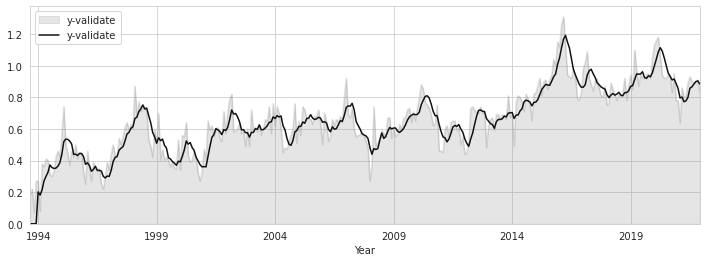

In [ ]:
df = tim.df_y[2].rolling(window=5).mean()
df.fillna(0,inplace=True)
ax = tim.df_y[2].plot.area(alpha=0.25,figsize=(12,4),color="#999999")
ax2 = df.plot.line(ax=ax,color="#111111")

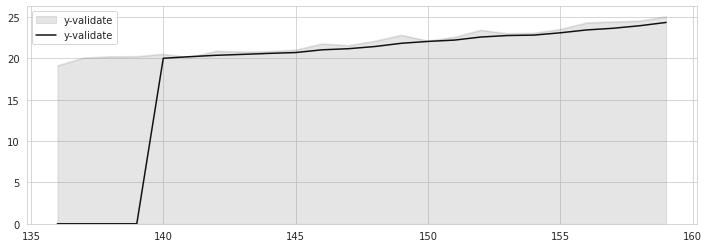

In [ ]:
df = tim.df_y[3].rolling(window=5).mean()
df.fillna(0,inplace=True)
ax = tim.df_y[3].plot.area(alpha=0.25,figsize=(12,4),color="#999999")
ax2 = df.plot.line(ax=ax,color="#111111")

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

In [ ]:
import statsmodels
import statsmodels.api
df = tim.df_x[0].copy()

#df = statsmodels.api.tsa.seasonal_decompose(tim.df_x[1],model='additive', extrapolate_trend='x-train',freq=1)
df.index = df.index.to_pydatetime()
df.index.name = "date"
df = df.asfreq('D')
#
df.head(20)

In [ ]:
dec = statsmodels.api.tsa.seasonal_decompose(tim.df_x[0],model='additive',freq=5)


In [ ]:
dec.plot()

In [ ]:
tim.df_x[1].head(50)

In [ ]:
dec = statsmodels.api.tsa.seasonal_decompose(tim.df_x[1],model='additive',freq=30)

In [ ]:
dec.plot()

In [ ]:
#
pandas.plotting.autocorrelation_plot(tim.df_x[0])

In [ ]:
ax = statsmodels.graphics.tsaplots.plot_pacf(tim.df_x[0])

In [ ]:
ax = statsmodels.graphics.tsaplots.plot_acf(tim.df_x[0])

- https://zenodo.org/record/3902690#.YdKmC3PML6Y
- http://tseregression.org/


4.1.2 Fetch real world data

>Side note: his website is an ongoing project to develop a comprehensive repository for research into time series classification. If you use the results or code, please cite the paper "Anthony Bagnall, Jason Lines, Aaron Bostrom, James Large and Eamonn Keogh, The Great Time Series Classification Bake Off: a Review and Experimental Evaluation of Recent Algorithmic Advances, Data Mining and Knowledge Discovery, 31(3), 2017". Paper Link, Bibtex Link. We are in the process of updating all the results for the new datasets.

>If you want to just reference the website, please do so as: "Anthony Bagnall, Jason Lines, William Vickers and Eamonn Keogh, The UEA & UCR Time Series Classification Repository, www.timeseriesclassification.com".

>Side note: The earthquake classification problem involves predicting whether a significant event will occur based on the most recent readings in the surrounding area. The data is taken from Northern California Earthquake Data Center, and each data point is an averaged reading for one hour, with the first reading taken on Dec 1st, 1967, the last in 2003.

>More information is on http://www.timeseriesclassification.com/dataset.php

>Side note: There are 134 Univariable dataset available for download. 



- https://timeseriesai.github.io/tsai/data.external.html#get_UCR_data

## 4.3 Forecast/Predict The Time Series Forecasting

### 4.3.1 autoregression (AR)

>Side note: The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

In [ ]:
#@title Algorithm Autoregression (AR)
#!pip install statsmodels  #uncomment if you system doesn't have statsmodels preinstall.
import statsmodels
import statsmodels.api
# autoregression (AR) 
@add_method(TSBook)
def predict_ar(self, data, y_true=None,name="Quadratic Line",horizon=0):
  model = statsmodels.api.tsa.ARIMA(data, order=(0, 0, 1))
  model_fit = model.fit()
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end))
  self._ph()
  self._pp("Algorithm", "Autoregression (AR)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " )
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [ ]:
yhat = tim.predict_ar(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="Autoregression (AR) Quadratic Prediction",ylabel="f(x)=x*x")

In [ ]:
yhat = tim.predict_ar(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="Autoregression (AR) Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [ ]:
yhat = tim.predict_ar(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="Autoregression (AR) Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [ ]:
yhat = tim.predict_ar(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="Autoregression (AR) World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.2 Autoregressive Moving Average (ARMA)

>Side note: The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at previous time steps.
It combines both Autoregression (AR) and Moving Average (MA) models.

In [ ]:
#@title Autoregressive Moving Average (ARMA)
@add_method(TSBook)
def predict_arma(self, data, y_true=None,name="Quadratic Line", horizon=0):
  model = statsmodels.api.tsa.ARIMA(data, order=(1, 1, 1))
  model_fit = model.fit()
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end, typ='levels'))
  self._ph()
  self._pp("Algorithm", "Autoregressive Moving Average (ARMA)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " )
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [ ]:
yhat = tim.predict_arma(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="Autoregressive Moving Average (ARMA) Quadratic Prediction",ylabel="f(x)=x*x")

In [ ]:
yhat = tim.predict_arma(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="Autoregressive Moving Average (ARMA) Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [ ]:
yhat = tim.predict_arma(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="Autoregressive Moving Average (ARMA) Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [ ]:
yhat = tim.predict_arma(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="Autoregressive Moving Average (ARMA) World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.3 Seasonal Autoregressive Integrated Moving Average (SARIMA)

>Side note: The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at previous time steps. It combines the ARIMA model to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

In [ ]:
#title Seasonal Autoregressive Integrated Moving Average (SARIMA)
@add_method(TSBook)
def predict_sarima(self, data, y_true=None,name="Quadratic Line",horizon=0):
  model = statsmodels.api.tsa.statespace.SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
  model_fit = model.fit(disp=False)
  # make prediction
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end))
  self._ph()
  self._pp("Algorithm", "Seasonal Autoregressive Integrated Moving Average (SARIMA)")
  self._pp("Time Series Data Set", name + ", Expected predict value is ")
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [ ]:
yhat = tim.predict_sarima(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="SARIMA Quadratic Prediction",ylabel="f(x)=x*x")

In [ ]:
yhat = tim.predict_sarima(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="SARIMA Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [ ]:
yhat = tim.predict_sarima(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="SARIMA Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [ ]:
yhat = tim.predict_sarima(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="SARIMA World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.4 Simple Exponential Smoothing (SES)

>Side note: The Simple Exponential Smoothing (SES) method models the next step as an exponentially weighted linear function of observations at the previous value. The algorithm is suitable for univariate time series without trend and seasonal components.

In [ ]:
#@title Simple Exponential Smoothing (SES) 
@add_method(TSBook)
def predict_ses(self, data, y_true=None,name="Quadratic Line",horizon=0):
  model = statsmodels.tsa.holtwinters.SimpleExpSmoothing(data)
  model_fit = model.fit()
  # make prediction
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end))
  self._ph()
  self._pp("Algorithm", "Simple Exponential Smoothing (SES)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " )
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [ ]:
yhat = tim.predict_ses(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="Simple Exponential Smoothing (SES) Quadratic Prediction",ylabel="f(x)=x*x")

In [ ]:
yhat = tim.predict_ses(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="Simple Exponential Smoothing (SES) Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [ ]:
yhat = tim.predict_ses(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="Simple Exponential Smoothing (SES) Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [ ]:
yhat = tim.predict_ses(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="Simple Exponential Smoothing (SES) World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.5 Holt Winter’s Exponential Smoothing (HWES)

>Side note: The Holt Winter’s Exponential Smoothing (HWES), also called the Triple Exponential Smoothing method, models the next step as an exponentially weighted linear function of observations at previous time steps, taking trends seasonality into account. The algorithm is suitable for univariate time series with trend and/or seasonal components.

In [ ]:
#title Holt Winter’s Exponential Smoothing (HWES) 
import statsmodels
import statsmodels.tsa.holtwinters
@add_method(TSBook)
def predict_hwes(self, data, y_true=None,name="HWES", horizon=0):
  model = statsmodels.tsa.holtwinters.ExponentialSmoothing(data)
  model_fit = model.fit()
  # make prediction
  start = len(data)
  end = start + horizon
  yhat = model_fit.predict(len(data), len(data))
  self._ph()
  self._pp("Algorithm", "Holt Winter’s Exponential Smoothing (HWES)")
  self._pp("Time Series Data Set", name)
  self._pp("Predict Value", yhat)
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return

In [ ]:
yhat = tim.predict_hwes(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

In [ ]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="SARIMA Quadratic Prediction",ylabel="f(x)=x*x")

In [ ]:
tim.predict_hwes(tim.x_earthquakes[0][0],name="Earthquakes, first window")

### 4.3.6 Vector Autoregression (VAR)

>Side note: Using an AR model, the Vector Autoregression (VAR) method models the next step in each time series. It is the generalization of AR to multiple parallel time series, e.g., multivariate time series. The algorithm is suitable for multivariate time series without trend and seasonal components.

In [ ]:
# fetch sample line data with noise
tim.ts_data_line_2 = tim.fetch_line_ts()

In [ ]:
statsmodels.__version__
# version 0.13.0 is fine. If you have lower then 0.6.0, you should upgrage
#!pip install stasmodels --upgrade    # uncomment if you need to upgrade

In [ ]:
#title Vector Autoregression (VAR) 
@add_method(D0HZ)
def predict_var(self, data1, data2,yhat_true=None,name="Quadratic Line"):
  xdata = list()
  for i in range(len(data1)):
    row = [data1[i], data2[i]]
    xdata.append(row)
  model = statsmodels.tsa.vector_ar.var_model.VAR(xdata)
  model_fit = model.fit()
  # make prediction
  # model_fit.y for version less then 0.6.1
  yhat = model_fit.forecast(model_fit.endog, steps=1)
  self._ph()
  self._pp("Algorithm", "Vector Autoregression (VAR)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " + str(yhat_true))
  self._pp("Predict Value", yhat)
  if (yhat_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(yhat,yhat_true))
  self._ph()
  return

In [ ]:
tim.predict_var(tim.ts_data_line, tim.ts_data_line_2,yhat_true=16.0,name="Quadratic Line")

In [ ]:
tim.predict_var(tim.x_earthquakes[0][0], tim.x_earthquakes[1][0],name="Earthquakes, first two windows")

In [ ]:
tim.predict_var(tim.x_heartbeat[0][0], tim.x_heartbeat[1][0],name="Heartbeat, first two windows")

- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAX.html

- https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

- https://medium.com/@oguiza/key-takeaways-from-kaggles-most-recent-time-series-competition-ventilator-pressure-prediction-7a1d2e4e0131

- https://otexts.com/fpp2/nnetar.html

### 4.3.7 Vector Autoregression Moving-Average (VARMA)

>Side note: Using an ARMA model, the Vector Autoregression Moving-Average (VARMA) method models the next step in each time series. It is the generalization of ARMA to multiple parallel time series, e.g., multivariate time series. The algorithm is suitable for multivariate time series without trend and seasonal components.

In [ ]:
#@title Vector Autoregression Moving-Average (VARMA) 
@add_method(D0HZ)
def predict_varma(self, data1, data2,yhat_true=None,name="Quadratic Line"):
  xdata = list()
  for i in range(len(data1)):
    row = [data1[i], data2[i]]
    xdata.append(row)
  model = statsmodels.tsa.statespace.varmax.VARMAX(xdata, order=(1, 1))
  model_fit = model.fit(disp=False)
  # make prediction
  yhat = model_fit.forecast()
  self._ph()
  self._pp("Algorithm", "Vector Autoregression Moving-Average (VARMA)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " + str(yhat_true))
  self._pp("Predict Value", yhat)
  if (yhat_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(yhat,yhat_true))
  self._ph()
  return

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tim.predict_varma(tim.ts_data_line, tim.ts_data_line_2,yhat_true=16.0,name="Quadratic Line")

In [ ]:
tim.predict_varma(tim.x_earthquakes[0][0], tim.x_earthquakes[1][0],name="Earthquakes, first two windows")

## 4.4 Using Machine Learning, artifical neural network (ANN)

>Side note: Deep learning is a computer technique to predict results using multiple layers of neural networks. The algorithms expertly solve human speech recognition, natural language processing (NLP), image classification, and collaborative filtering. Each of these layers takes its inputs from previous layers and progressively refines them. The algorithms train each layer to minimize their errors and improve their accuracy. 

>Industries and think tanks are using deep learning across many disciplines. They include but are not limited to medician, physic, social media, commerce, supply chain, finance, and gaming. 

In [ ]:
#title Fetch real world time series data
# data from http://tseregression.org/
import numpy
import matplotlib
import statsmodels
import pandas
@add_method(TSBook)
def fetch_tse_data(self,dname,is_split=False):
  yt = None
  if (is_split):
    x,y,z,yt = tsai.data.external.get_Monash_regression_data(dname,split_data=is_split)
  else:
    x,y,z = tsai.data.external.get_Monash_regression_data(dname,split_data=is_split)
  m,n,r = x.shape
  arr = numpy.column_stack((numpy.repeat(numpy.arange(m),n),x.reshape(m*n,-1)))
  df = pandas.DataFrame(arr)
  df = df.drop(0, axis=1) # remove the index column
  #
  #
  #ax = self.draw_xy_line(pandas.DataFrame(x),pandas.DataFrame(y),is_reset_index=True)
  #
  display(df.tail(5))
  
  return x,y,z,yt,df

>Side Note: The TSE website aims to support research into Time Series Extrinsic Regression (TSER). It is regression research whose aim is to determine the relationship between a time series and a continuous scalar variable. The study is closely related to time series classification (TSC), which aims to discover the relationship between a time series and a categorical class label. We recommend you [read the paper](https://arxiv.org/abs/2006.10996) for a detailed discussion of the datasets and their sources. 

>If you use the results or code, please cite the paper "Chang Wei Tan, Christoph Bergmeir, Francois Petitjean, Geoffrey I. Webb, Time Series Extrinsic Regression: Predicting numeric values from time-series data."

>Side note: The "Appliances Energy" dataset's goal is to predict total energy usage in kWh of a house. This dataset contains 138 time series obtained from the Appliances Energy Prediction dataset from the UCI repository. The time series has 24 dimensions. This includes temperature and humidity measurements of 9 rooms in a house, monitored with a ZigBee wireless sensor network. It also includes weather and climate data such as temperature, pressure, humidity, wind speed, visibility and dewpoint measured from Chievres airport. The data set is averaged for 10 minutes period and spanning 4.5 months.

>Please refer to https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction  for more details

In [ ]:
tim.x_appliances, tim.y_appliances, tim_split_appliances, yt,df = tim.fetch_tse_data("AppliancesEnergy")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
3283,758.4,758.350000,758.300000,758.25,758.200000,758.150000,758.1,758.083333,758.066667,758.05,758.033333,758.016667,758.0,757.966667,757.933333,757.90,757.866667,757.833333,757.8,757.850000,757.900000,757.95,758.000000,758.050000,758.1,758.100000,758.100000,758.1,758.100000,758.100000,758.1,758.100000,758.100000,758.10,758.100000,758.100000,758.1,758.116667,758.133333,758.15,...,757.133333,757.10,757.066667,757.033333,757.0,756.966667,756.933333,756.90,756.866667,756.833333,756.8,756.783333,756.766667,756.75,756.733333,756.716667,756.7,756.666667,756.633333,756.60,756.566667,756.533333,756.5,756.466667,756.433333,756.40,756.366667,756.333333,756.3,756.283333,756.266667,756.25,756.233333,756.216667,756.2,756.200000,756.200000,756.20,756.200000,756.200000
3284,67.0,66.833333,66.666667,66.50,66.333333,66.166667,66.0,65.833333,65.666667,65.50,65.333333,65.166667,65.0,66.000000,67.000000,68.00,69.000000,70.000000,71.0,71.000000,71.000000,71.00,71.000000,71.000000,71.0,71.000000,71.000000,71.0,71.000000,71.000000,71.0,72.333333,73.666667,75.00,76.333333,77.666667,79.0,79.333333,79.666667,80.00,...,71.000000,68.50,66.000000,63.500000,61.0,61.333333,61.666667,62.00,62.333333,62.666667,63.0,63.333333,63.666667,64.00,64.333333,64.666667,65.0,63.666667,62.333333,61.00,59.666667,58.333333,57.0,57.166667,57.333333,57.50,57.666667,57.833333,58.0,57.666667,57.333333,57.00,56.666667,56.333333,56.0,55.166667,54.333333,53.50,52.666667,51.833333
3285,4.0,4.166667,4.333333,4.50,4.666667,4.833333,5.0,5.166667,5.333333,5.50,5.666667,5.833333,6.0,6.000000,6.000000,6.00,6.000000,6.000000,6.0,5.833333,5.666667,5.50,5.333333,5.166667,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,4.666667,4.333333,4.00,3.666667,3.333333,3.0,2.666667,2.333333,2.00,...,1.000000,1.00,1.000000,1.000000,1.0,1.000000,1.000000,1.00,1.000000,1.000000,1.0,1.000000,1.000000,1.00,1.000000,1.000000,1.0,1.166667,1.333333,1.50,1.666667,1.833333,2.0,2.000000,2.000000,2.00,2.000000,2.000000,2.0,2.000000,2.000000,2.00,2.000000,2.000000,2.0,1.833333,1.666667,1.50,1.333333,1.166667
3286,40.0,40.000000,40.000000,40.00,40.000000,40.000000,40.0,38.166667,36.333333,34.50,32.666667,30.833333,29.0,28.833333,28.666667,28.50,28.333333,28.166667,28.0,28.166667,28.333333,28.50,28.666667,28.833333,29.0,29.000000,29.000000,29.0,29.000000,29.000000,29.0,29.000000,29.000000,29.00,29.000000,29.000000,29.0,29.000000,29.000000,29.00,...,28.333333,28.50,28.666667,28.833333,29.0,28.333333,27.666667,27.00,26.333333,25.666667,25.0,27.500000,30.000000,32.50,35.000000,37.500000,40.0,38.000000,36.000000,34.00,32.000000,30.000000,28.0,30.000000,32.000000,34.00,36.000000,38.000000,40.0,40.000000,40.000000,40.00,40.000000,40.000000,40.0,37.833333,35.666667,33.50,31.333333,29.166667
3287,7.8,7.800000,7.800000,7.80,7.800000,7.800000,7.8,7.650000,7.500000,7.35,7.200000,7.050000,6.9,6.950000,7.000000,7.05,7.100000,7.150000,7.2,7.016667,6.833333,6.65,6.466667,6.283333,6.1,5.966667,5.833333,5.7,5.566667,5.433333,5.3,5.450000,5.600000,5.75,5.900000,6.050000,6.2,6.183333,6.166667,6.15,...,5.900000,5.75,5.600000,5.450000,5.3,5.483333,5.666667,5.85,6.033333,6.216667,6.4,6.550000,6.700000,6.85,7.000000,7.150000,7.3,7.116667,6.933333,6.75,6.566667,6.383333,6.2,6.250000,6.300000,6.35,6.400000,6.450000,6.5,6.600000,6.700000,6.80,6.900000,7.000000,7.1,6.883333,6.666667,6.45,6.233333,6.016667


>Side note: The Covid-19 dataset's goal is to predict COVID-19's death rate on 1st April 2020 for each country using daily confirmed cases for the last three months. This dataset contains 201 time series, where each time series is the daily confirmed cases for a country. The data was obtained from WHO's COVID-19 database.

>Please refer to https://covid19.who.int/ for more details

In [ ]:
tim.x_covid19, tim.y_covid19, tim.split_covid19,xt,df = tim.fetch_tse_data("Covid3Month")

153it [00:00, 8192.21it/s]
74it [00:00, 9124.22it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,4.0,4.0,11.0,6.0,1.0,6.0,13.0,17.0,14.0,0.0,14.0,15.0,16.0,24.0,28.0,22.0,32.0,32.0,35.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,27.0,3.0,10.0,7.0,3.0,0.0,4.0,3.0,16.0,18.0,28.0,79.0,61.0,29.0,18.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,1.0,9.0,0.0,0.0,0.0,0.0,13.0,12.0


#### scratch

In [ ]:
tim.x_covid19

memmap([[[ 0.,  0.,  0., ...,  0.,  0., 12.]],

        [[ 0.,  0.,  0., ...,  9.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0., ...,  2.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  1.,  0.]],

        [[ 0.,  0.,  0., ...,  0., 13., 12.]]])

###4.4.1 SKLearn

>Side note: The scikit-learn project started as scikits.learn, a Google Summer of Code project by David Cournapeau. Its name stems from the notion that it is a "SciKit" (SciPy Toolkit), a separately developed and distributed third-party extension to SciPy.[4] Other developers later rewrote the original codebase. In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort, and Vincent Michel, all from the French Institute for Research in Computer Science and Automation in Rocquencourt, France, took leadership of the project made the first public release on February the 1st 2010.[5] Of the various scikits, scikit-learn and scikit-image were described as "well-maintained and popular" in November 2012.[6] Scikit-learn is one of the most popular machine learning libraries on GitHub.[7]

>https://scikit-learn.org/stable/#

In [ ]:
tim.xt_covid19, tim.yt_covid19, tim.xv_covid19, tim.yv_covid19,df = tim.fetch_tse_data("Covid3Month",is_split=True)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,0.0,3.0,6.0,4.0,1.0,1.0,4.0,3.0,0.0,1.0,2.0,0.0,6.0,1.0,4.0,7.0,0.0,1.0,2.0,22.0,7.0,6.0,9.0,9.0,2.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,66.0,0.0,92.0,34.0,20.0,33.0,9.0,16.0,23.0,0.0,20.0,26.0,17.0,35.0,134.0,37.0,65.0,39.0,36.0
138,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,4.0,17.0,59.0,77.0,93.0,152.0,131.0,261.0,462.0,688.0,776.0,1772.0,1462.0,1741.0,1984.0,2101.0,2590.0,2827.0,3233.0,3892.0,3697.0,3151.0,3387.0,2653.0,2985.0,2472.0,2022.0,15152.0,4050.0,2644.0,2008.0,...,892.0,825.0,649.0,221.0,517.0,411.0,440.0,329.0,430.0,579.0,206.0,128.0,120.0,143.0,146.0,102.0,46.0,45.0,20.0,31.0,26.0,10.0,30.0,27.0,29.0,39.0,58.0,126.0,116.0,82.0,1.0,104.0,164.0,102.0,92.0,132.0,120.0,128.0,114.0,90.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,0.0,1.0,2.0,4.0,7.0,5.0


In [ ]:
#title The scikit-learn
import sklearn
import sklearn.metrics
import tsai
import tsai.models
@add_method(TSBook)
def predict_sklearn(self, xt, yt,xv,yv,name="Covid-19"):
  #
  sk_mse = sklearn.metrics._scorer.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better=False)
  learn = tsai.models.MINIROCKET.MiniRocketRegressor(scoring=sk_mse)
  learn.fit(xt,yt)
  y_hat = learn.predict(xv)
  loss_rate = sklearn.metrics.mean_squared_error(yv,y_hat, squared=False)
  #
  self._ph()
  self._pp("Framework", "Scikit-Learn (SKLearn)")
  self._pp("Time Series Data Set", name )
  self._pp("Final Loss Rate (RMSE)", round(loss_rate,6))
  self._ph()
  return 

In [ ]:
tim.predict_sklearn(tim.xt_covid19,tim.yt_covid19,tim.xv_covid19,tim.yv_covid19,name="Covid-19")

---------------------------------------- : ----------------------------------------
                               Framework : Scikit-Learn (SKLearn)
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : 0.041655
---------------------------------------- : ----------------------------------------


### 4.4.2 Long short-term memory (LSTM)

>Side Note: Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process single data points (such as images) and entire sequences of data (such as speech or video). For example, LSTM applies to tasks such as unsegmented, connected handwriting recognition,[2] speech recognition[3][4], and anomaly detection in network traffic or IDSs (intrusion detection systems).

>A standard LSTM unit comprises a cell, an input gate, an output gate, and a forget gate. The cell remembers values over arbitrary time intervals, and the three gates regulate the flow of information into and out of the cell.

>LSTM networks are well-suited for classifying, processing, and making predictions based on time series data. There can be lags of unknown duration between significant events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models, and other sequence learning methods in numerous applications.

- https://link.springer.com/article/10.1007%2Fs00477-020-01776-2

- https://ieeexplore.ieee.org/abstract/document/9112272

In [ ]:
#title Artificial Neural Network
import fastai
import tsai
import tsai.models
@add_method(TSBook)
def predict_ann(self, x,y,spl,mod,xname="Covid-19",epoch=50):
  #
  self._ph()
  self._pp("Framework", "Fast.ai & TSAI")
  self._pp("Algorithm", str(mod))
  self._pp("Time Series Data Set", xname )
  self._pp("Final Loss Rate (RMSE)", "[see below]")
  self._ph()

  tfms  = [None, [tsai.data.core.TSRegression()]]
  btfms = tsai.data.preprocessing.TSStandardize(by_sample=True, by_var=True)
  dls = tsai.data.core.get_ts_dls(x, y, splits=spl, tfms=tfms, batch_tfms=btfms)
  learn = tsai.learner.ts_learner(dls, mod, 
    metrics=[tsai.metrics.mae, fastai.metrics.rmse], cbs=tsai.callback.core.ShowGraph())
  lr = learn.lr_find()
  learn.fit_one_cycle(epoch, lr.valley)
  return learn

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.RNN.LSTM'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.008133,0.007905,0.076047,0.088911,00:00
1,0.007542,0.006040,0.063430,0.077716,00:00
2,0.006580,0.003681,0.042387,0.060671,00:00
3,0.005542,0.001912,0.029690,0.043732,00:00
4,0.004667,0.002373,0.042550,0.048718,00:00
5,0.004381,0.003925,0.056862,0.062650,00:00
6,0.004404,0.003158,0.050961,0.056200,00:00
7,0.004196,0.001799,0.033935,0.042412,00:00
8,0.003852,0.002429,0.031447,0.049288,00:00
9,0.003641,0.003059,0.036629,0.055304,00:00


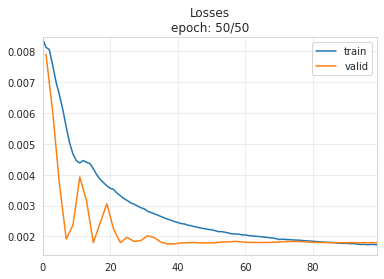

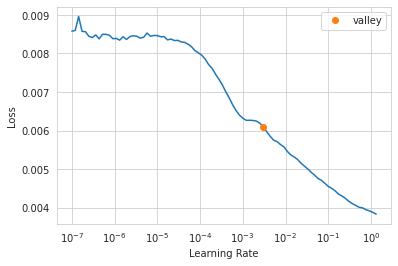

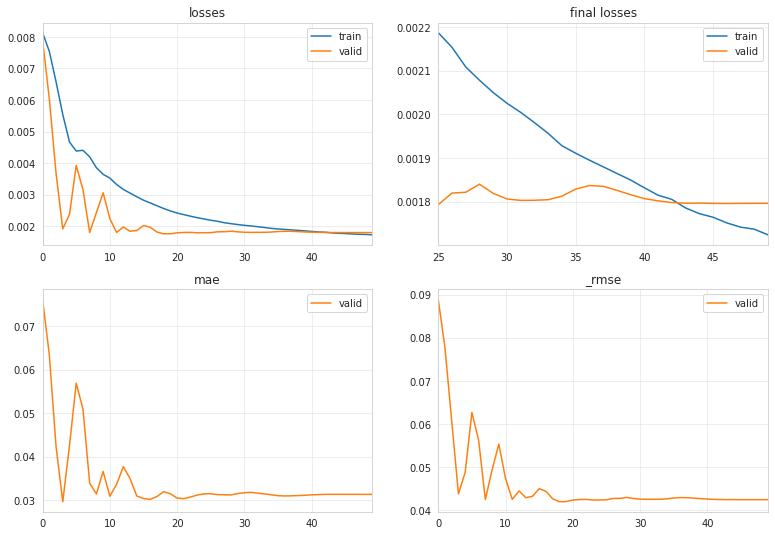

In [ ]:
tim.learn_lstm=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.RNN.LSTM,xname="Covid-19")

In [ ]:
#tim.learn_lstm.show_results(max_n=6)

#### scratch (good tsai)

In [ ]:
import tsai
import fastai
@add_method(TSBook)
def fetch_sliding_windows(self,ts,wlength,y_horizion=1,stride=1):
  x,y = tsai.data.preparation.SlidingWindow(window_len=wlength, stride=stride)(ts)
  return x,y

In [ ]:
ts_x,ts_y = tim.fetch_sliding_windows(tim.df_x[0],wlength=1024)

In [ ]:
print("ts_x type and shape: ", type(ts_x), ts_x.shape)
print("ts_y type and shape: ", type(ts_y), ts_y.shape)
print("x size: ", len(tim.df_x[0]))

ts_x type and shape:  <class 'numpy.ndarray'> (46, 1, 1024)
ts_y type and shape:  <class 'numpy.ndarray'> (46,)
x size:  1070


In [ ]:
@add_method(TSBook)
def fetch_xysplit(self,y,y_size):
  sp = tsai.data.validation.get_splits(y,valid_size=y_size,shuffle=False)
  return sp

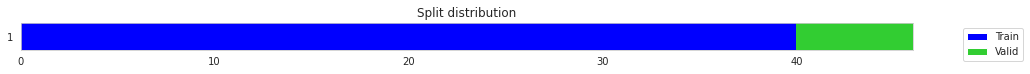

In [ ]:
ts_split = tim.fetch_xysplit(ts_y,y_size=0.15)

In [ ]:
tim.say_gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.90 GB
                            Free GPU RAM :  14.88 GB
                            Free CPU RAM :  21.17 GB
            Garbage collection recovered : 45634.00
---------------------------------------- : ----------------------------------------


In [ ]:
@add_method(TSBook)
def fetch_ts_loader(self,x,y,sp=None):
  if (sp is None):
    sp = self.fetch_xysplit()
  tfms = [None, [tsai.data.core.TSRegression()]]
  batch_tfms = tsai.data.preprocessing.TSStandardize(by_sample=True, by_var=True)
  dls = tsai.data.core.get_ts_dls(x, y, splits=sp, tfms=tfms, batch_tfms=batch_tfms)
  return dls

In [ ]:
dloader = tim.fetch_ts_loader(ts_x,ts_y,ts_split)

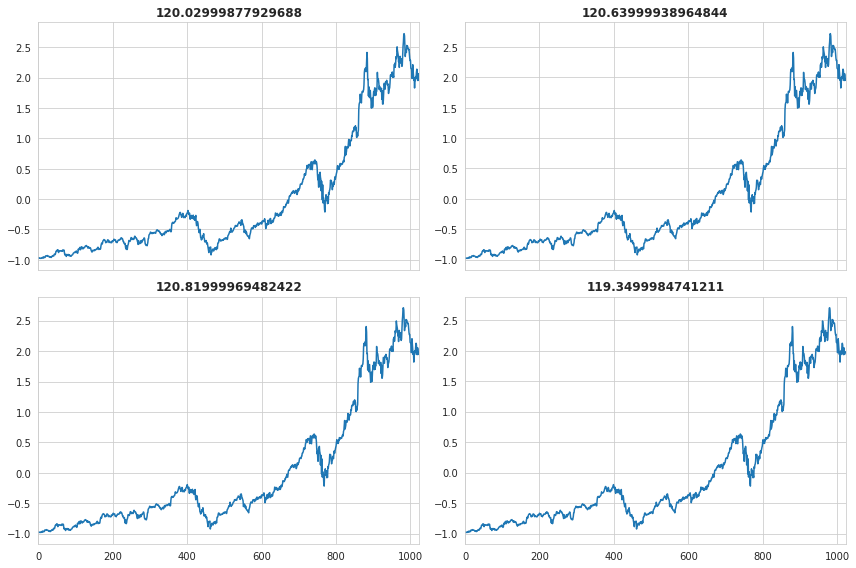

In [ ]:
dloader.show_batch(max_n=4)

In [ ]:
LSTM

tsai.models.RNN.LSTM

In [ ]:
@add_method(TSBook)
def fetch_learner_ts(self,dls,mod=None):
  if (mod is None):
    mod = tsai.models.InceptionTime.InceptionTime
  learn = tsai.learner.ts_learner(dls, mod, metrics=[mae, rmse], cbs=ShowGraph())
  a = learn.lr_find()
  # print (a.valley)
  return learn, a

In [ ]:
del learn
tim.say_gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.90 GB
                            Free GPU RAM :  14.88 GB
                            Free CPU RAM :  21.17 GB
            Garbage collection recovered : 9332.00
---------------------------------------- : ----------------------------------------


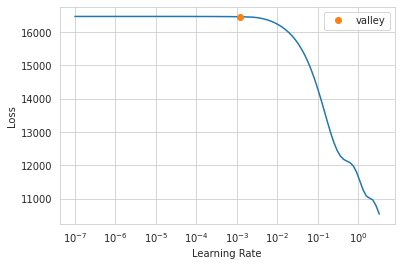

In [ ]:
learn, lrate = tim.fetch_learner_ts(dloader, tsai.models.RNN.LSTM)

In [ ]:
print(lrate)

SuggestedLRs(valley=0.0012022644514217973)


In [ ]:
print(lrate.valley)

0.0012022644514217973


epoch,train_loss,valid_loss,mae,_rmse,time
0,20.906857,5.111822,2.047675,2.260934,00:00
1,20.906496,5.114603,2.048354,2.261549,00:00
2,20.906115,5.118167,2.049224,2.262336,00:00
3,20.905670,5.122734,2.050338,2.263346,00:00
4,20.905138,5.128993,2.051863,2.264728,00:00
5,20.904482,5.137043,2.053824,2.266505,00:00
6,20.903679,5.147360,2.056334,2.268779,00:00
7,20.902700,5.160140,2.059439,2.271594,00:00
8,20.901520,5.175521,2.063170,2.274977,00:00
9,20.900126,5.193799,2.067595,2.278991,00:00


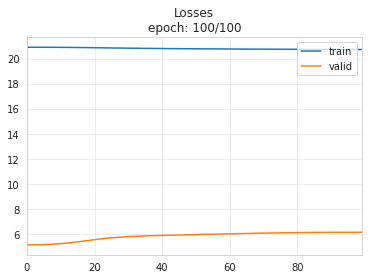

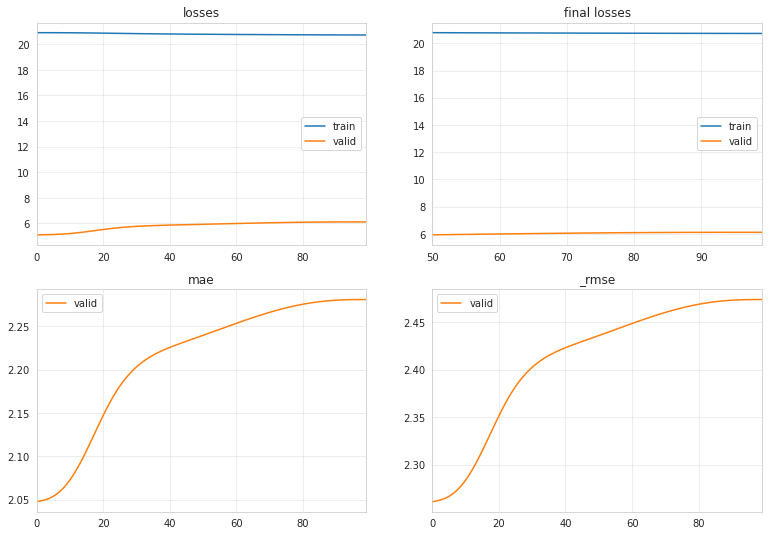

In [ ]:
learn.fit_one_cycle(100, 0.03)

### 4.4.3 InceptionTime

>Side note: InceptionTime: Finding AlexNet for Time Series Classification. The paper brings deep learning to the forefront of research into Time Series Classification (TSC). TSC is the area of machine learning tasked with the categorization (or labeling) of time series. The last few decades of work in this area have led to significant progress in the accuracy of classifiers, with state-of-the-art now represented by the HIVE-COTE algorithm. While extremely accurate, HIVE-COTE cannot be applied to many real-world datasets because its high training time complexity is O(N2 * T4) for a dataset with N time series of length T.

- https://arxiv.org/abs/1909.04939

In [ ]:
tim.learn_itime=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.InceptionTime.InceptionTime,xname="Covid-19")

###4.4.4 ResNet

>Side note: Time Series Classification (TSC) received wide attention in machine learning and data mining and arose in various fields, such as scheduling, logistics, medical and health, and more. How to overcome the noise in the time series datasets is one of the critical challenges of the TSC. In this paper, we propose a hybrid Residual Network (ResNet) with a genetic algorithm-based network structure optimization for robust TSC, named GA-ResNet. Although network structure optimization is one of the key ways to obtain an effective deep neural network model, this structure optimization is an NP-hard problem. We design a genetic algorithm for the ResNet structure optimization. Several benchmarks are adopted to prove the effectiveness of the proposed GA-ResNet compared with six state-of-the-art deep neural networks.

- https://ieeexplore.ieee.org/abstract/document/8965287

In [ ]:
tim.learn_resnet=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.ResNet.ResNet,xname="Covid-19")

###4.4.5 Fully Convolutional Network (FCN)

>Side note: Convolutional networks are powerful visual models that
yield hierarchies of features. We show that convolutional networks by themselves, trained end-to-end, pixelsto pixels, exceed the state-of-the-art in semantic segmentation. Our critical insight is to build “fully convolutional” networks that take input of the arbitrary size and produce
correspondingly-sized output with efficient inference and learning. We define and detail the space of fully convolutional networks, explain their application to spatially dense prediction tasks, and draw connections to prior models.

- https://arxiv.org/pdf/1411.4038.pdf

In [ ]:
tim.learn_fcn=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.FCN.FCN,xname="Covid-19")

###4.4.6 MiniRocket

>Side note, Until recently, the most accurate methods for time series classification were limited by high computational complexity. ROCKET achieves state-of-the-art accuracy with a fraction of the computational expense of most existing methods by transforming input time series using random convolutional kernels and using the transformed features to train a linear classifier. We reformulate ROCKET into a new method, MINIROCKET, making it up to 75 times faster on larger datasets and almost deterministic.  Optionally, with additional computational expense, fully deterministic), while maintaining essentially the same accuracy. Using this method, it is possible to train and test a classifier on all 109 datasets from the UCR archive to state-of-the-art accuracy in less than 10 minutes. MINIROCKET is significantly faster than any other method of comparable accuracy (including ROCKET) and substantially more accurate than any other method of even roughly similar computational expense. As such, we suggest that MINIROCKET should now be considered and used as the default variant of ROCKET.

- https://arxiv.org/abs/2012.08791

In [ ]:
tim.learn_rocket=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.MINIROCKET_Pytorch.MiniRocket,xname="Covid-19")

In [ ]:
tim.learn_rocket=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.MINIROCKET_Pytorch.MiniRocket,xname="Covid-19")

In [ ]:
tim.learn_rocket=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.MINIROCKET_Pytorch.MiniRocket,xname="Covid-19",epoch=10)

>Side note: training is getting better while valid gets worst. It's a classic case of overfitting. 

# Scratch


## Frist one

- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


predicted=349.117714, expected=342.300000
predicted=306.513014, expected=339.700000
predicted=387.376484, expected=440.400000
predicted=348.154245, expected=315.900000
predicted=386.308817, expected=439.300000
predicted=356.082027, expected=401.300000
predicted=446.379533, expected=437.400000
predicted=394.737186, expected=575.500000
predicted=434.915490, expected=407.600000
predicted=507.923370, expected=682.000000
predicted=435.482832, expected=475.300000
predicted=652.743835, expected=581.300000
predicted=546.343452, expected=646.900000
Test RMSE: 83.417


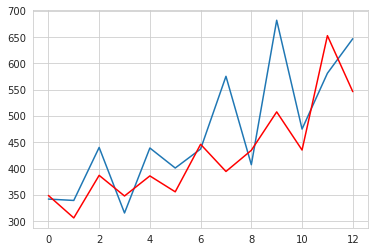

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
import statsmodels
import statsmodels.api
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('./shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
#
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = statsmodels.api.tsa.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
test

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [ ]:
train

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5])

In [ ]:
series

Month
1901-01    266.0
1901-02    145.9
1901-03    183.1
1901-04    119.3
1901-05    180.3
1901-06    168.5
1901-07    231.8
1901-08    224.5
1901-09    192.8
1901-10    122.9
1901-11    336.5
1901-12    185.9
1902-01    194.3
1902-02    149.5
1902-03    210.1
1902-04    273.3
1902-05    191.4
1902-06    287.0
1902-07    226.0
1902-08    303.6
1902-09    289.9
1902-10    421.6
1902-11    264.5
1902-12    342.3
1903-01    339.7
1903-02    440.4
1903-03    315.9
1903-04    439.3
1903-05    401.3
1903-06    437.4
1903-07    575.5
1903-08    407.6
1903-09    682.0
1903-10    475.3
1903-11    581.3
1903-12    646.9
Freq: M, Name: Sales, dtype: float64

In [ ]:
type(series)

pandas.core.series.Series

In [ ]:
train

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5])

In [ ]:
test

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

## Auto Arima

- a https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 63.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
lnk = "https://raw.githubusercontent.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/master/Champagne%20Sales.csv"
sales_data = pd.read_csv(lnk)

In [ ]:
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
sales_data.tail()

,Month,Champagne sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [ ]:
sales_data.dtypes

Month              object
Champagne sales     int64
dtype: object

In [ ]:
sales_data['Month']=pd.to_datetime(sales_data['Month'])
sales_data.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [ ]:
sales_data.set_index('Month',inplace=True)
sales_data.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


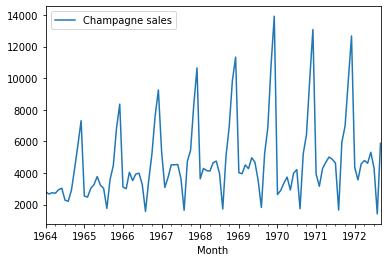

In [ ]:
sales_data.plot()

In [ ]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

In [ ]:
#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]
display(train.head())
display(test.tail())

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


,Champagne sales
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


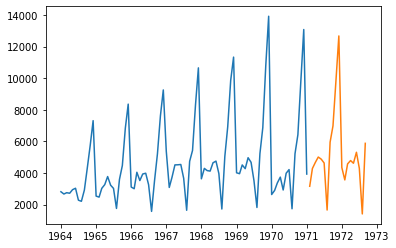

In [ ]:
plt.plot(train)
plt.plot(test)

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
  max_p=5, max_d=5, max_q=5, start_P=0, 
  D=1, start_Q=0, max_P=5, max_D=5,
  max_Q=5, m=12, seasonal=True, 
  error_action='warn',trace = True,
  supress_warnings=True,stepwise = True,
  random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.48 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.13 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.20 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.641, Time=1.15 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.26 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [ ]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Mon, 28 Feb 2022   AIC                           1174.564
Time:                                     22:28:49   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.705536
1971-03-01,3247.915385
1971-04-01,3592.504230
1971-05-01,2800.878941
1971-06-01,3841.899504
1971-07-01,4088.022991
1971-08-01,1596.301800
1971-09-01,5090.002289
1971-10-01,6284.001523


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


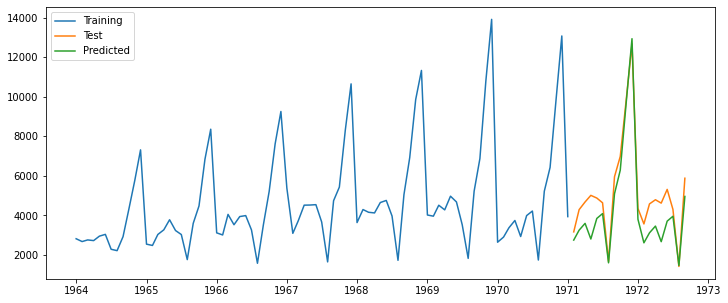

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [ ]:
display(test.head())
display(prediction.head())

,Champagne sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874


,predicted_sales
Month,
1971-02-01,2746.705536
1971-03-01,3247.915385
1971-04-01,3592.504230
1971-05-01,2800.878941
1971-06-01,3841.899504


In [ ]:
from sklearn.metrics import r2_score
r2_score(test['Champagne sales'], prediction['predicted_sales'])

0.8114747596044508

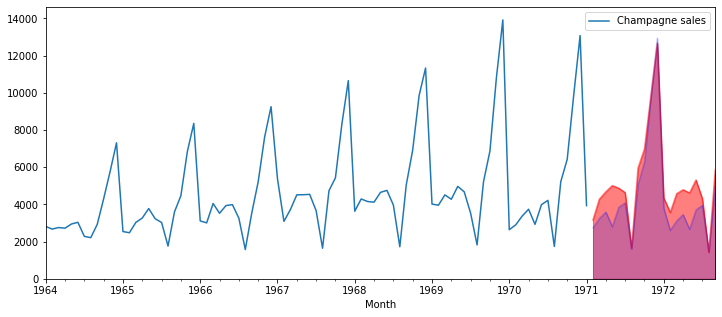

In [ ]:
ax = train.plot.line(figsize=(12,5))
ax = test["Champagne sales"].plot.area(alpha=0.5,ax=ax,color="red")
ax = prediction["predicted_sales"].plot.area(alpha=0.2,ax=ax,color="blue")
plt.show()

In [ ]:
import sklearn

In [ ]:
loss = np.sqrt(sklearn.metrics.mean_squared_error(test['Champagne sales'],prediction['predicted_sales']))
print(loss)

1060.2452304128396


## Quad

In [ ]:
display(tim.df4_quadratic_x.head())
display(tim.df4_quadratic_y.head())

In [ ]:
arima_quad =  auto_arima(tim.df4_quadratic_x,start_p=0, d=1, start_q=0, 
  max_p=5, max_d=5, max_q=5, start_P=0, 
  D=1, start_Q=0, max_P=5, max_D=5,
  max_Q=5, m=12, seasonal=False, 
  error_action='warn',trace = True,
  supress_warnings=True,stepwise = True,
  random_state=20,n_fits = 50 )

In [ ]:
#Summary of the model
arima_quad.summary()

In [ ]:
ylen = len(tim.df4_quadratic_y)
quad_prediction = pd.DataFrame(arima_quad.predict(n_periods = ylen),index=tim.df4_quadratic_y.index)
quad_prediction.columns = ['y_hat']
display(quad_prediction.head())
display(tim.df4_quadratic_y.head())

In [ ]:
r2_loss = r2_score(tim.df4_quadratic_y['y-validate'], quad_prediction['y_hat'])
print(r2_loss)

In [ ]:
loss = np.sqrt(sklearn.metrics.mean_squared_error(tim.df4_quadratic_y['y-validate'], quad_prediction['y_hat']))
print(loss)

In [ ]:
ax = tim.df4_quadratic_x.plot.line(figsize=(12,5))
ax = tim.df4_quadratic_y.plot.area(alpha=0.5,ax=ax,color="red")
ax = quad_prediction.plot.area(alpha=0.2,ax=ax,color="blue")
plt.show()

## method auto arima


In [ ]:
@add_method(TSBook)
def predict_arima(self,x,y, seasonal=False):
  #
  self.say_gpu_info()
  #
  adf_test = ADFTest()
  ad = adf_test.should_diff(x)
  print(ad)
  #
  amodel =  auto_arima(x,start_p=0, d=1, start_q=0, 
    max_p=5, max_d=5, max_q=5, start_P=0, 
    D=1, start_Q=0, max_P=5, max_D=5,
    max_Q=5, m=12, seasonal=seasonal, 
    error_action='warn',trace = True,
    supress_warnings=True,stepwise = True,
    random_state=20,n_fits = 50)
  #
  amodel.summary()
  #
  ylen = len(y)
  y_hat = pd.DataFrame(amodel.predict(n_periods = ylen),index=y.index)
  y_hat.columns = ['y_hat']
  display(y_hat.head())
  display(y.head())
  #
  r2_loss = r2_score(y, y_hat)
  print(r2_loss)
  #
  loss = np.sqrt(sklearn.metrics.mean_squared_error(y, y_hat))
  print(loss)
  #
  #ax = x.plot.line(figsize=(12,5))
  ax = y.plot.area(alpha=0.5,color="red",figsize=(12,5))
  ax = y_hat.plot.area(alpha=0.2,ax=ax,color="blue")
  plt.show()
  return y_hat

In [ ]:
plt.plot(train)
plt.plot(test)

In [ ]:
pred = tim.predict_arima(train,test,seasonal=True)

In [ ]:
tim.df4_quadratic_y_hat = tim.predict_arima(tim.df4_quadratic_x, tim.df4_quadratic_y,seasonal=False)

In [ ]:
tim.df4_quadratic_y_hat = tim.predict_arima(tim.df1_stock_x, tim.df1_stock_y,seasonal=True)

In [ ]:
tim.df2_covid19_youth_y_hat = tim.predict_arima(tim.df2_covid19_youth_x, tim.df2_covid19_youth_y,seasonal=False)

In [ ]:
tim.df3_climate_y_hat = tim.predict_arima(tim.df3_climate_x, tim.df3_climate_y,seasonal=True)